Ce code permet de tracer le graphe du réseau 0

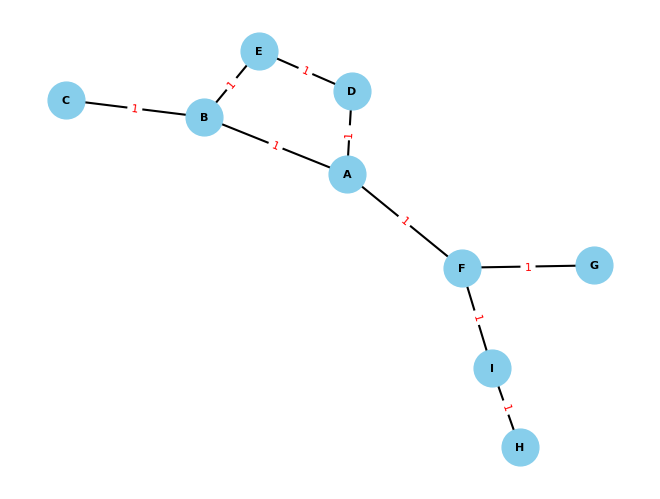

In [ ]:


import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
G.add_nodes_from(nodes)

# Ajouter les arc de poids 1
edges = [('A', 'B'), ('A', 'D'), ('A', 'F'),
         ('B', 'C'), ('B', 'E'),
         ('D', 'E'),
         ('F', 'G'), ('F', 'I'),
         ('I', 'H')]

G.add_edges_from(edges)

# Tracer le graphe
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, font_color='black', width=1.5)
edge_labels = {(i, j): 1 for i, j in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

plt.show()



---


1_la centralité en termes d'importance du voisinage
---



Tableau de la centralité en termes d'importance du voisinage:
  Node  Degree Centrality  Rank
0    A              0.375   1.0
1    B              0.375   1.0
2    F              0.375   1.0
3    D              0.250   2.0
4    E              0.250   2.0
5    I              0.250   2.0
6    C              0.125   3.0
7    G              0.125   3.0
8    H              0.125   3.0


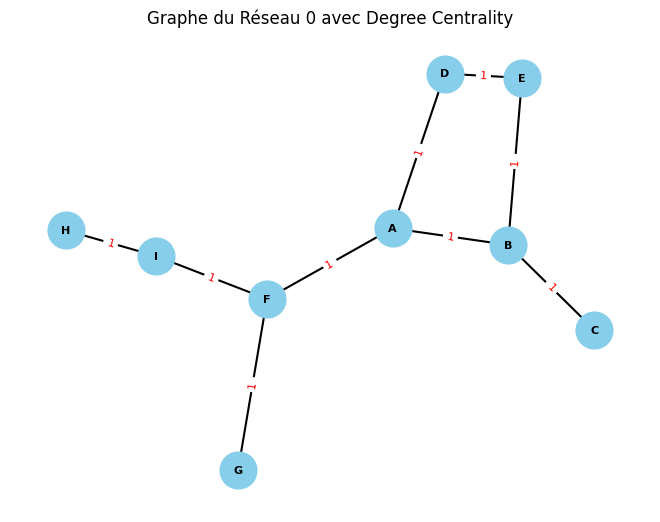

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Création du graphe
G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
G.add_nodes_from(nodes)

# Ajouter les arcs de poids 1
edges = [('A', 'B'), ('A', 'D'), ('A', 'F'),
         ('B', 'C'), ('B', 'E'),
         ('D', 'E'),
         ('F', 'G'), ('F', 'I'),
         ('I', 'H')]

G.add_edges_from(edges)

# Calcul de la centralité en termes d'importance du voisinage (Degree Centrality)
degree_centrality = nx.degree_centrality(G)

# Conversion des résultats en tableau
centrality_table = pd.DataFrame(list(degree_centrality.items()), columns=['Node', 'Degree Centrality'])
centrality_table['Rank'] = centrality_table['Degree Centrality'].rank(ascending=False, method='dense')
centrality_table = centrality_table.sort_values(by='Degree Centrality', ascending=False).reset_index(drop=True)

# Affichage du tableau
print("Tableau de la centralité en termes d'importance du voisinage:")
print(centrality_table)

# Tracer le graphe
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, font_color='black', width=1.5)
edge_labels = {(i, j): 1 for i, j in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

plt.title("Graphe du Réseau 0 avec Degree Centrality")
plt.show()



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Lecture du fichier pour construire le graphe
def read_graph_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        num_nodes, num_edges = map(int, lines[0].split())
        edges = [tuple(line.strip().split()) for line in lines[1:]]
    return num_nodes, num_edges, edges

# Charger les données du fichier
file_path = "/content/corporate_collaboration_network.txt"  # Remplacez par le chemin de votre fichier
num_nodes, num_edges, edges = read_graph_from_file(file_path)

# Création du graphe
G = nx.Graph()
G.add_edges_from(edges)
# Ajouter tous les nœuds pour inclure les isolés
all_nodes = [f"C{i}" for i in range(1, num_nodes + 1)]
G.add_nodes_from(all_nodes)

# Vérifier les arêtes
print("Arêtes du graphe:", list(G.edges()))

# Calcul de la centralité en termes d'importance du voisinage (Degree Centrality)
degree_centrality = nx.degree_centrality(G)

# Conversion des résultats en tableau
centrality_table = pd.DataFrame(list(degree_centrality.items()), columns=['Node', 'Degree Centrality'])
centrality_table['Rank'] = centrality_table['Degree Centrality'].rank(ascending=False, method='dense')
centrality_table = centrality_table.sort_values(by=['Rank', 'Node']).reset_index(drop=True)

# Affichage du tableau
print("Tableau de la centralité en termes d'importance du voisinage (ordre des nœuds):")
print(centrality_table)





Arêtes du graphe: [('C18', 'C72'), ('C18', 'C81'), ('C18', 'C74'), ('C18', 'C92'), ('C18', 'C58'), ('C18', 'C2'), ('C72', 'C35'), ('C72', 'C47'), ('C72', 'C46'), ('C72', 'C30'), ('C79', 'C88'), ('C79', 'C54'), ('C79', 'C68'), ('C79', 'C57'), ('C79', 'C30'), ('C79', 'C5'), ('C88', 'C51'), ('C81', 'C41'), ('C81', 'C59'), ('C81', 'C95'), ('C1', 'C95'), ('C1', 'C23'), ('C1', 'C52'), ('C1', 'C93'), ('C95', 'C14'), ('C95', 'C22'), ('C95', 'C52'), ('C26', 'C94'), ('C26', 'C87'), ('C26', 'C11'), ('C94', 'C15'), ('C94', 'C24'), ('C94', 'C8'), ('C94', 'C87'), ('C94', 'C91'), ('C94', 'C49'), ('C15', 'C60'), ('C15', 'C12'), ('C15', 'C29'), ('C15', 'C93'), ('C15', 'C31'), ('C15', 'C58'), ('C15', 'C42'), ('C61', 'C70'), ('C70', 'C82'), ('C70', 'C84'), ('C70', 'C93'), ('C70', 'C45'), ('C82', 'C35'), ('C82', 'C44'), ('C39', 'C42'), ('C39', 'C38'), ('C39', 'C56'), ('C42', 'C59'), ('C42', 'C40'), ('C42', 'C6'), ('C42', 'C8'), ('C8', 'C73'), ('C73', 'C32'), ('C73', 'C34'), ('C73', 'C50'), ('C73', 'C86'),

Réseau 2 international_research_collaboration

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Lecture du fichier pour construire le graphe
def read_graph_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        num_nodes, num_edges = map(int, lines[0].split())
        edges = [tuple(line.strip().split()) for line in lines[1:]]
    return num_nodes, num_edges, edges

# Charger les données du fichier
file_path = "/content/international_research_collaboration.txt"  # Remplacez par le chemin de votre fichier
num_nodes, num_edges, edges = read_graph_from_file(file_path)

# Création du graphe
G = nx.Graph()
G.add_edges_from(edges)
# Ajouter tous les nœuds pour inclure les isolés
all_nodes = [f"C{i}" for i in range(1, num_nodes + 1)]
G.add_nodes_from(all_nodes)

# Vérifier les arêtes
print("Arêtes du graphe:", list(G.edges()))

# Calcul de la centralité en termes d'importance du voisinage (Degree Centrality)
degree_centrality = nx.degree_centrality(G)

# Conversion des résultats en tableau
centrality_table = pd.DataFrame(list(degree_centrality.items()), columns=['Node', 'Degree Centrality'])
centrality_table['Rank'] = centrality_table['Degree Centrality'].rank(ascending=False, method='dense')
centrality_table = centrality_table.sort_values(by=['Rank', 'Node']).reset_index(drop=True)

# Affichage du tableau
print("Tableau de la centralité en termes d'importance du voisinage (ordre des nœuds):")
print(centrality_table)

Arêtes du graphe: [('R50', 'R61'), ('R50', 'R26'), ('R50', 'R28'), ('R50', 'R69'), ('R61', 'R70'), ('R61', 'R10'), ('R61', 'R17'), ('R61', 'R77'), ('R7', 'R35'), ('R7', 'R65'), ('R7', 'R28'), ('R7', 'R69'), ('R7', 'R62'), ('R7', 'R38'), ('R35', 'R18'), ('R35', 'R53'), ('R35', 'R30'), ('R35', 'R32'), ('R70', 'R10'), ('R70', 'R63'), ('R70', 'R14'), ('R70', 'R48'), ('R18', 'R37'), ('R18', 'R12'), ('R18', 'R62'), ('R18', 'R57'), ('R18', 'R14'), ('R10', 'R56'), ('R10', 'R65'), ('R10', 'R28'), ('R10', 'R67'), ('R10', 'R4'), ('R10', 'R75'), ('R11', 'R69'), ('R11', 'R71'), ('R11', 'R57'), ('R11', 'R29'), ('R11', 'R40'), ('R11', 'R42'), ('R11', 'R74'), ('R69', 'R74'), ('R69', 'R20'), ('R69', 'R48'), ('R69', 'R75'), ('R69', 'R55'), ('R69', 'R2'), ('R69', 'R4'), ('R69', 'R79'), ('R6', 'R48'), ('R6', 'R27'), ('R6', 'R72'), ('R6', 'R30'), ('R48', 'R56'), ('R48', 'R51'), ('R48', 'R23'), ('R48', 'R25'), ('R57', 'R66'), ('R57', 'R1'), ('R57', 'R14'), ('R57', 'R71'), ('R66', 'R59'), ('R66', 'R22'), ('R

Réseau 3 regional_gaming_community

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
# Lecture du fichier pour construire le graphe
def read_graph_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        num_nodes, num_edges = map(int, lines[0].split())
        edges = [tuple(line.strip().split()) for line in lines[1:]]
    return num_nodes, num_edges, edges
# Charger les données du fichier
file_path = "/content/regional_gaming_community.txt"  # Remplacez par le chemin de votre fichier
num_nodes, num_edges, edges = read_graph_from_file(file_path)
# Création du graphe
G = nx.Graph()
G.add_edges_from(edges)
# Ajouter tous les nœuds pour inclure les isolés
all_nodes = [f"C{i}" for i in range(1, num_nodes + 1)]
G.add_nodes_from(all_nodes)

# Vérifier les arêtes
print("Arêtes du graphe:", list(G.edges()))

# Calcul de la centralité en termes d'importance du voisinage (Degree Centrality)
degree_centrality = nx.degree_centrality(G)

# Conversion des résultats en tableau
centrality_table = pd.DataFrame(list(degree_centrality.items()), columns=['Node', 'Degree Centrality'])
centrality_table['Rank'] = centrality_table['Degree Centrality'].rank(ascending=False, method='dense')
centrality_table = centrality_table.sort_values(by=['Rank', 'Node']).reset_index(drop=True)

# Affichage du tableau
print("Tableau de la centralité en termes d'importance du voisinage (ordre des nœuds):")
print(centrality_table)

Arêtes du graphe: [('G26', 'G30'), ('G26', 'G9'), ('G26', 'G53'), ('G26', 'G1'), ('G26', 'G14'), ('G26', 'G49'), ('G30', 'G57'), ('G30', 'G34'), ('G30', 'G36'), ('G30', 'G47'), ('G30', 'G11'), ('G24', 'G42'), ('G24', 'G44'), ('G24', 'G8'), ('G24', 'G56'), ('G42', 'G59'), ('G42', 'G53'), ('G42', 'G55'), ('G1', 'G49'), ('G49', 'G14'), ('G49', 'G10'), ('G49', 'G19'), ('G49', 'G11'), ('G49', 'G35'), ('G5', 'G28'), ('G5', 'G37'), ('G5', 'G21'), ('G5', 'G50'), ('G5', 'G27'), ('G28', 'G51'), ('G28', 'G20'), ('G28', 'G41'), ('G9', 'G16'), ('G9', 'G18'), ('G9', 'G27'), ('G9', 'G13'), ('G37', 'G11'), ('G37', 'G12'), ('G37', 'G41'), ('G37', 'G17'), ('G14', 'G35'), ('G14', 'G21'), ('G14', 'G47'), ('G13', 'G17'), ('G13', 'G44'), ('G13', 'G19'), ('G13', 'G54'), ('G17', 'G46'), ('G17', 'G41'), ('G17', 'G12'), ('G17', 'G2'), ('G17', 'G47'), ('G17', 'G56'), ('G15', 'G23'), ('G15', 'G12'), ('G15', 'G8'), ('G15', 'G58'), ('G15', 'G11'), ('G15', 'G7'), ('G23', 'G29'), ('G23', 'G35'), ('G23', 'G58'), ('G23

regional_gaming_community

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
# Lecture du fichier pour construire le graphe
def read_graph_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        num_nodes, num_edges = map(int, lines[0].split())
        edges = [tuple(line.strip().split()) for line in lines[1:]]
    return num_nodes, num_edges, edges
# Charger les données du fichier
file_path = "/content/regional_gaming_community.txt"  # Remplacez par le chemin de votre fichier
num_nodes, num_edges, edges = read_graph_from_file(file_path)
# Création du graphe
G = nx.Graph()
G.add_edges_from(edges)
# Ajouter tous les nœuds pour inclure les isolés
all_nodes = [f"C{i}" for i in range(1, num_nodes + 1)]
G.add_nodes_from(all_nodes)

# Vérifier les arêtes
print("Arêtes du graphe:", list(G.edges()))

# Calcul de la centralité en termes d'importance du voisinage (Degree Centrality)
degree_centrality = nx.degree_centrality(G)

# Conversion des résultats en tableau
centrality_table = pd.DataFrame(list(degree_centrality.items()), columns=['Node', 'Degree Centrality'])
centrality_table['Rank'] = centrality_table['Degree Centrality'].rank(ascending=False, method='dense')
centrality_table = centrality_table.sort_values(by=['Rank', 'Node']).reset_index(drop=True)

# Affichage du tableau
print("Tableau de la centralité en termes d'importance du voisinage (ordre des nœuds):")
print(centrality_table)

Arêtes du graphe: [('G26', 'G30'), ('G26', 'G9'), ('G26', 'G53'), ('G26', 'G1'), ('G26', 'G14'), ('G26', 'G49'), ('G30', 'G57'), ('G30', 'G34'), ('G30', 'G36'), ('G30', 'G47'), ('G30', 'G11'), ('G24', 'G42'), ('G24', 'G44'), ('G24', 'G8'), ('G24', 'G56'), ('G42', 'G59'), ('G42', 'G53'), ('G42', 'G55'), ('G1', 'G49'), ('G49', 'G14'), ('G49', 'G10'), ('G49', 'G19'), ('G49', 'G11'), ('G49', 'G35'), ('G5', 'G28'), ('G5', 'G37'), ('G5', 'G21'), ('G5', 'G50'), ('G5', 'G27'), ('G28', 'G51'), ('G28', 'G20'), ('G28', 'G41'), ('G9', 'G16'), ('G9', 'G18'), ('G9', 'G27'), ('G9', 'G13'), ('G37', 'G11'), ('G37', 'G12'), ('G37', 'G41'), ('G37', 'G17'), ('G14', 'G35'), ('G14', 'G21'), ('G14', 'G47'), ('G13', 'G17'), ('G13', 'G44'), ('G13', 'G19'), ('G13', 'G54'), ('G17', 'G46'), ('G17', 'G41'), ('G17', 'G12'), ('G17', 'G2'), ('G17', 'G47'), ('G17', 'G56'), ('G15', 'G23'), ('G15', 'G12'), ('G15', 'G8'), ('G15', 'G58'), ('G15', 'G11'), ('G15', 'G7'), ('G23', 'G29'), ('G23', 'G35'), ('G23', 'G58'), ('G23

university_students_projects

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
# Lecture du fichier pour construire le graphe
def read_graph_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        num_nodes, num_edges = map(int, lines[0].split())
        edges = [tuple(line.strip().split()) for line in lines[1:]]
    return num_nodes, num_edges, edges
# Charger les données du fichier
file_path = "/content/university_students_projects.txt"  # Remplacez par le chemin de votre fichier
num_nodes, num_edges, edges = read_graph_from_file(file_path)
# Création du graphe
G = nx.Graph()
G.add_edges_from(edges)
# Ajouter tous les nœuds pour inclure les isolés
all_nodes = [f"C{i}" for i in range(1, num_nodes + 1)]
G.add_nodes_from(all_nodes)

# Vérifier les arêtes
print("Arêtes du graphe:", list(G.edges()))

# Calcul de la centralité en termes d'importance du voisinage (Degree Centrality)
degree_centrality = nx.degree_centrality(G)

# Conversion des résultats en tableau
centrality_table = pd.DataFrame(list(degree_centrality.items()), columns=['Node', 'Degree Centrality'])
centrality_table['Rank'] = centrality_table['Degree Centrality'].rank(ascending=False, method='dense')
centrality_table = centrality_table.sort_values(by=['Rank', 'Node']).reset_index(drop=True)

# Affichage du tableau
print("Tableau de la centralité en termes d'importance du voisinage (ordre des nœuds):")
print(centrality_table)

Arêtes du graphe: [('U13', 'U42'), ('U13', 'U19'), ('U13', 'U6'), ('U13', 'U45'), ('U42', 'U3'), ('U42', 'U36'), ('U42', 'U26'), ('U42', 'U15'), ('U26', 'U39'), ('U26', 'U29'), ('U26', 'U38'), ('U39', 'U38'), ('U39', 'U50'), ('U39', 'U33'), ('U39', 'U45'), ('U8', 'U18'), ('U8', 'U1'), ('U8', 'U45'), ('U8', 'U38'), ('U8', 'U28'), ('U8', 'U21'), ('U8', 'U16'), ('U18', 'U43'), ('U18', 'U45'), ('U18', 'U9'), ('U18', 'U40'), ('U18', 'U24'), ('U14', 'U31'), ('U14', 'U49'), ('U14', 'U7'), ('U14', 'U19'), ('U14', 'U32'), ('U14', 'U47'), ('U31', 'U10'), ('U22', 'U44'), ('U22', 'U32'), ('U22', 'U50'), ('U22', 'U43'), ('U22', 'U49'), ('U44', 'U7'), ('U44', 'U10'), ('U44', 'U48'), ('U44', 'U21'), ('U49', 'U48'), ('U49', 'U40'), ('U49', 'U47'), ('U49', 'U17'), ('U7', 'U19'), ('U7', 'U50'), ('U7', 'U34'), ('U7', 'U29'), ('U19', 'U20'), ('U19', 'U2'), ('U19', 'U28'), ('U2', 'U32'), ('U2', 'U34'), ('U2', 'U45'), ('U2', 'U15'), ('U32', 'U21'), ('U32', 'U11'), ('U32', 'U48'), ('U1', 'U50'), ('U1', 'U34'

**village_friendship_network**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
# Lecture du fichier pour construire le graphe
def read_graph_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        num_nodes, num_edges = map(int, lines[0].split())
        edges = [tuple(line.strip().split()) for line in lines[1:]]
    return num_nodes, num_edges, edges
# Charger les données du fichier
file_path = "/content/village_friendship_network.txt"  # Remplacez par le chemin de votre fichier
num_nodes, num_edges, edges = read_graph_from_file(file_path)
# Création du graphe
G = nx.Graph()
G.add_edges_from(edges)
# Ajouter tous les nœuds pour inclure les isolés
all_nodes = [f"C{i}" for i in range(1, num_nodes + 1)]
G.add_nodes_from(all_nodes)

# Vérifier les arêtes
print("Arêtes du graphe:", list(G.edges()))

# Calcul de la centralité en termes d'importance du voisinage (Degree Centrality)
degree_centrality = nx.degree_centrality(G)

# Conversion des résultats en tableau
centrality_table = pd.DataFrame(list(degree_centrality.items()), columns=['Node', 'Degree Centrality'])
centrality_table['Rank'] = centrality_table['Degree Centrality'].rank(ascending=False, method='dense')
centrality_table = centrality_table.sort_values(by=['Rank', 'Node']).reset_index(drop=True)

# Affichage du tableau
print("Tableau de la centralité en termes d'importance du voisinage (ordre des nœuds):")
print(centrality_table)

Arêtes du graphe: [('V6', 'V15'), ('V6', 'V17'), ('V6', 'V9'), ('V15', 'V10'), ('V15', 'V20'), ('V15', 'V16'), ('V4', 'V9'), ('V4', 'V8'), ('V4', 'V14'), ('V4', 'V19'), ('V9', 'V8'), ('V9', 'V5'), ('V9', 'V16'), ('V9', 'V13'), ('V9', 'V19'), ('V12', 'V16'), ('V12', 'V7'), ('V16', 'V13'), ('V16', 'V1'), ('V5', 'V13'), ('V8', 'V2'), ('V8', 'V17'), ('V8', 'V20'), ('V8', 'V3'), ('V1', 'V3'), ('V1', 'V17'), ('V2', 'V20'), ('V10', 'V20'), ('V14', 'V18'), ('V19', 'V11')]
Tableau de la centralité en termes d'importance du voisinage (ordre des nœuds):
   Node  Degree Centrality  Rank
0    V9           0.179487   1.0
1    V8           0.153846   2.0
2   V16           0.128205   3.0
3   V15           0.102564   4.0
4   V20           0.102564   4.0
5    V4           0.102564   4.0
6    V1           0.076923   5.0
7   V13           0.076923   5.0
8   V17           0.076923   5.0
9   V19           0.076923   5.0
10   V6           0.076923   5.0
11  V10           0.051282   6.0
12  V12           0.05

**Centralité 2:** **début**

réseau 0

In [ ]:
import numpy as np

# Génération automatique de la matrice d'adjacence
nodes = ["A", "B", "C", "D", "E", "F", "G", "H", "I"]
adj_matrix = np.array([
    [0, 1, 0, 1, 0, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0, 1, 0]
])

# Calcul des valeurs propres et vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(adj_matrix)

# Sélectionner le vecteur propre principal (associé à la plus grande valeur propre)
principal_eigenvector = np.abs(eigenvectors[:, np.argmax(eigenvalues)])

# Normaliser les centralités
centrality_scores = principal_eigenvector / np.sum(principal_eigenvector)

# Calcul des statistiques
min_centrality = np.min(centrality_scores)
max_centrality = np.max(centrality_scores)
mean_centrality = np.mean(centrality_scores)

# Identifier les nœuds concernés
min_nodes = [nodes[i] for i, score in enumerate(centrality_scores) if score == min_centrality]
max_nodes = [nodes[i] for i, score in enumerate(centrality_scores) if score == max_centrality]
closest_to_mean_node = nodes[np.argmin(np.abs(centrality_scores - mean_centrality))]
closest_to_mean_value = centrality_scores[np.argmin(np.abs(centrality_scores - mean_centrality))]

# Afficher les résultats
print("\nRéseau 0 - Centralité des vecteurs propres :")
print(f"Minimum : {min_centrality:.4f}, Nœud(s) : {min_nodes}")
print(f"Maximum : {max_centrality:.4f}, Nœud(s) : {max_nodes}")
print(f"Moyenne : {mean_centrality:.4f}, Nœud le plus proche : {closest_to_mean_node} (Valeur : {closest_to_mean_value:.4f})")



Réseau 0 - Centralité des vecteurs propres :
Minimum : 0.0530, Nœud(s) : ['H']
Maximum : 0.2016, Nœud(s) : ['A']
Moyenne : 0.1111, Nœud le plus proche : I (Valeur : 0.1132)


la centralité des vecteurs propres pour un réseau d'amitié dans un village:

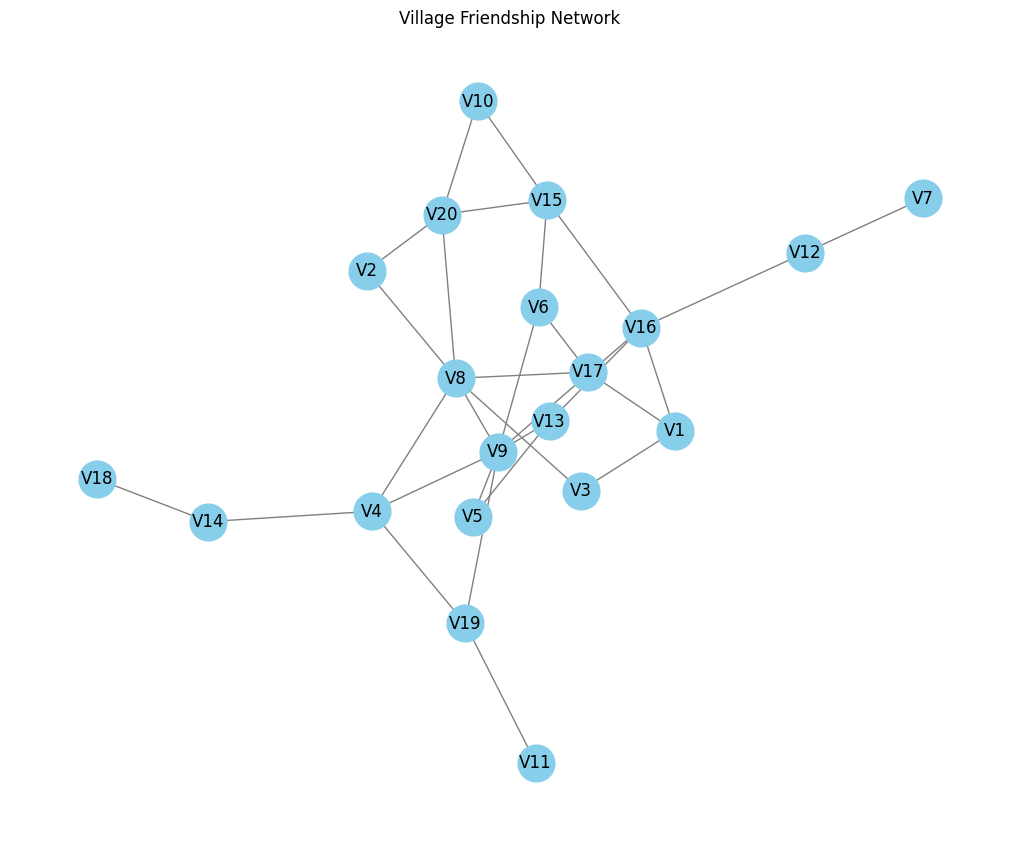

Matrice d'adjacence:
[[0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0]
 [1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

Centralité des vecteurs propres:
Min: 0.0208, Nœud(s): ['V18']
Max: 0.4786, Nœud(s): ['V9']
Moyenne: 0.1920, Nœud le 

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Étape 1 : Construire et tracer le réseau
# Liste des arêtes du fichier
edges = [
    ("V6", "V15"), ("V4", "V9"), ("V12", "V16"), ("V5", "V13"), ("V8", "V9"),
    ("V1", "V3"), ("V2", "V8"), ("V10", "V15"), ("V2", "V20"), ("V15", "V20"),
    ("V6", "V17"), ("V4", "V8"), ("V4", "V14"), ("V5", "V9"), ("V14", "V18"),
    ("V9", "V16"), ("V9", "V13"), ("V9", "V19"), ("V8", "V17"), ("V11", "V19"),
    ("V8", "V20"), ("V13", "V16"), ("V10", "V20"), ("V1", "V17"), ("V15", "V16"),
    ("V7", "V12"), ("V3", "V8"), ("V4", "V19"), ("V1", "V16"), ("V6", "V9")
]

# Créer le graphe
G = nx.Graph()
G.add_edges_from(edges)

# Tracer le graphe
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Disposition des nœuds
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=700, edge_color="gray")
plt.title("Village Friendship Network")
plt.show()

# Étape 2 : Extraire la matrice d'adjacence
adj_matrix = nx.adjacency_matrix(G).todense()
print("Matrice d'adjacence:")
print(adj_matrix)

# Étape 3 : Calcul des centralités des vecteurs propres
# Calculer la centralité des vecteurs propres
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

# Extraire les valeurs
centrality_values = list(eigenvector_centrality.values())
nodes = list(eigenvector_centrality.keys())

# Calcul des statistiques
centrality_min = np.min(centrality_values)
centrality_max = np.max(centrality_values)
centrality_mean = np.mean(centrality_values)

# Identifier les nœuds associés
min_nodes = [nodes[i] for i, val in enumerate(centrality_values) if val == centrality_min]
max_nodes = [nodes[i] for i, val in enumerate(centrality_values) if val == centrality_max]
closest_to_mean_node = nodes[np.argmin(np.abs(np.array(centrality_values) - centrality_mean))]
closest_to_mean_value = centrality_values[np.argmin(np.abs(np.array(centrality_values) - centrality_mean))]

# Afficher les résultats avec les nœuds associés
print("\nCentralité des vecteurs propres:")
print(f"Min: {centrality_min:.4f}, Nœud(s): {min_nodes}")
print(f"Max: {centrality_max:.4f}, Nœud(s): {max_nodes}")
print(f"Moyenne: {centrality_mean:.4f}, Nœud le plus proche : {closest_to_mean_node} (Valeur : {closest_to_mean_value:.4f})")


la centralité des vecteurs propres pour un réseau d’étudiants dans une classe universitaire, connectés par des projets partagés.

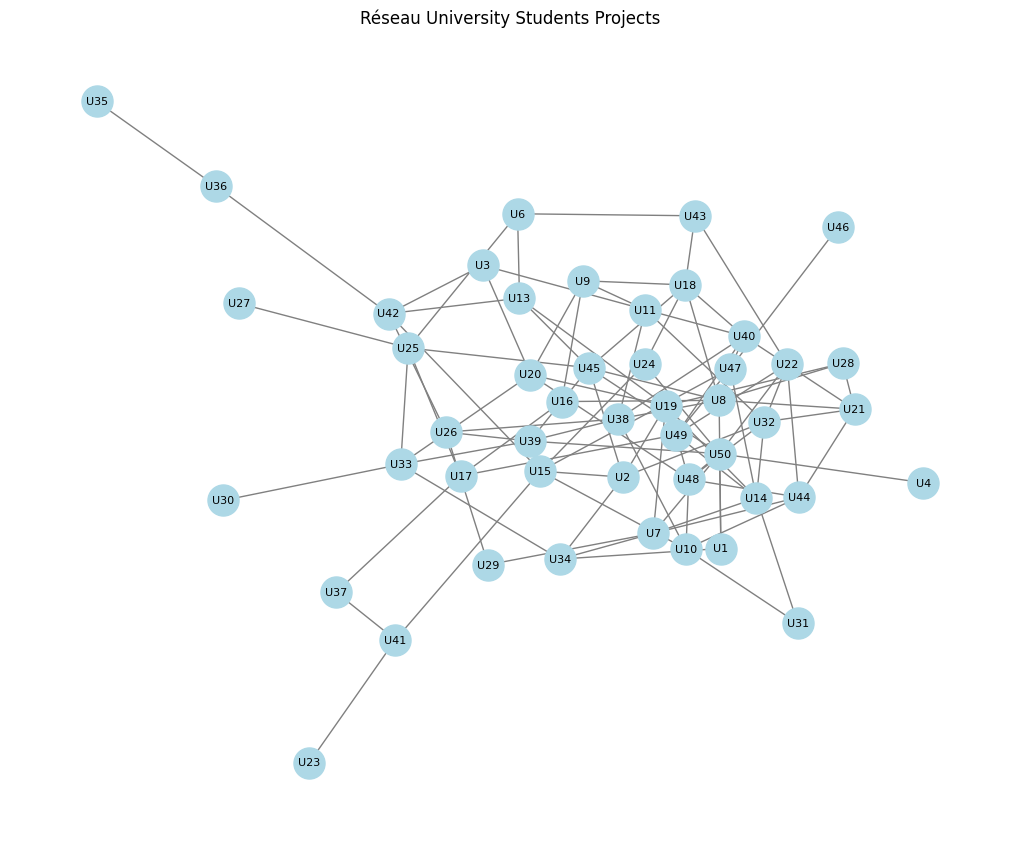

Matrice d'adjacence :
 [[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Centralité des vecteurs propres :
Min : 0.0035, Nœud(s) : ['U35']
Max : 0.2551, Nœud(s) : ['U50']
Moyenne : 0.1257, Nœud le plus proche : U34 (Valeur : 0.1158)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Données du réseau
edges_university_students_projects = [
    ("U13", "U42"), ("U26", "U39"), ("U8", "U18"), ("U14", "U31"), ("U22", "U44"),
    ("U14", "U49"), ("U7", "U19"), ("U2", "U32"), ("U1", "U8"), ("U3", "U42"),
    ("U13", "U19"), ("U6", "U13"), ("U4", "U50"), ("U25", "U27"), ("U10", "U38"),
    ("U2", "U34"), ("U25", "U45"), ("U38", "U39"), ("U20", "U33"), ("U48", "U49"),
    ("U21", "U32"), ("U6", "U43"), ("U16", "U17"), ("U7", "U14"), ("U10", "U31"),
    ("U2", "U45"), ("U14", "U19"), ("U22", "U32"), ("U40", "U47"), ("U7", "U44"),
    ("U10", "U15"), ("U11", "U32"), ("U8", "U45"), ("U32", "U48"), ("U46", "U47"),
    ("U15", "U41"), ("U9", "U16"), ("U40", "U49"), ("U19", "U20"), ("U8", "U38"),
    ("U25", "U33"), ("U10", "U44"), ("U14", "U32"), ("U17", "U25"), ("U2", "U15"),
    ("U45", "U50"), ("U21", "U40"), ("U7", "U50"), ("U30", "U33"), ("U47", "U49"),
    ("U22", "U50"), ("U11", "U38"), ("U26", "U29"), ("U26", "U38"), ("U38", "U40"),
    ("U7", "U34"), ("U24", "U50"), ("U15", "U47"), ("U18", "U43"), ("U39", "U50"),
    ("U22", "U43"), ("U36", "U42"), ("U37", "U41"), ("U2", "U19"), ("U11", "U40"),
    ("U3", "U11"), ("U1", "U50"), ("U18", "U45"), ("U9", "U18"), ("U20", "U48"),
    ("U19", "U28"), ("U8", "U28"), ("U17", "U49"), ("U15", "U24"), ("U33", "U39"),
    ("U1", "U34"), ("U35", "U36"), ("U44", "U48"), ("U13", "U45"), ("U26", "U42"),
    ("U15", "U42"), ("U21", "U28"), ("U7", "U29"), ("U39", "U45"), ("U9", "U11"),
    ("U8", "U21"), ("U9", "U20"), ("U10", "U48"), ("U18", "U40"), ("U48", "U50"),
    ("U22", "U49"), ("U33", "U34"), ("U6", "U25"), ("U18", "U24"), ("U3", "U20"),
    ("U8", "U16"), ("U21", "U44"), ("U23", "U41"), ("U17", "U37"), ("U14", "U47")
]

# Création du graphe
G = nx.Graph()
G.add_edges_from(edges_university_students_projects)

# Tracé du réseau
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=8)
plt.title("Réseau University Students Projects")
plt.show()

# Extraction de la matrice d'adjacence
adj_matrix = nx.adjacency_matrix(G).todense()
print("Matrice d'adjacence :\n", adj_matrix)

# Calcul de la centralité des vecteurs propres
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

# Extraire les valeurs de centralité
centrality_values = list(eigenvector_centrality.values())
nodes = list(eigenvector_centrality.keys())

# Calcul des statistiques
centrality_min = np.min(centrality_values)
centrality_max = np.max(centrality_values)
centrality_mean = np.mean(centrality_values)

# Identifier les nœuds associés
min_nodes = [nodes[i] for i, val in enumerate(centrality_values) if val == centrality_min]
max_nodes = [nodes[i] for i, val in enumerate(centrality_values) if val == centrality_max]
closest_to_mean_node = nodes[np.argmin(np.abs(np.array(centrality_values) - centrality_mean))]
closest_to_mean_value = centrality_values[np.argmin(np.abs(np.array(centrality_values) - centrality_mean))]

# Afficher les résultats avec les nœuds associés
print("\nCentralité des vecteurs propres :")
print(f"Min : {centrality_min:.4f}, Nœud(s) : {min_nodes}")
print(f"Max : {centrality_max:.4f}, Nœud(s) : {max_nodes}")
print(f"Moyenne : {centrality_mean:.4f}, Nœud le plus proche : {closest_to_mean_node} (Valeur : {closest_to_mean_value:.4f})")


la centralité des vecteurs propres pour un réseau corporatif d’employés et leurs relations de travail collaboratif.

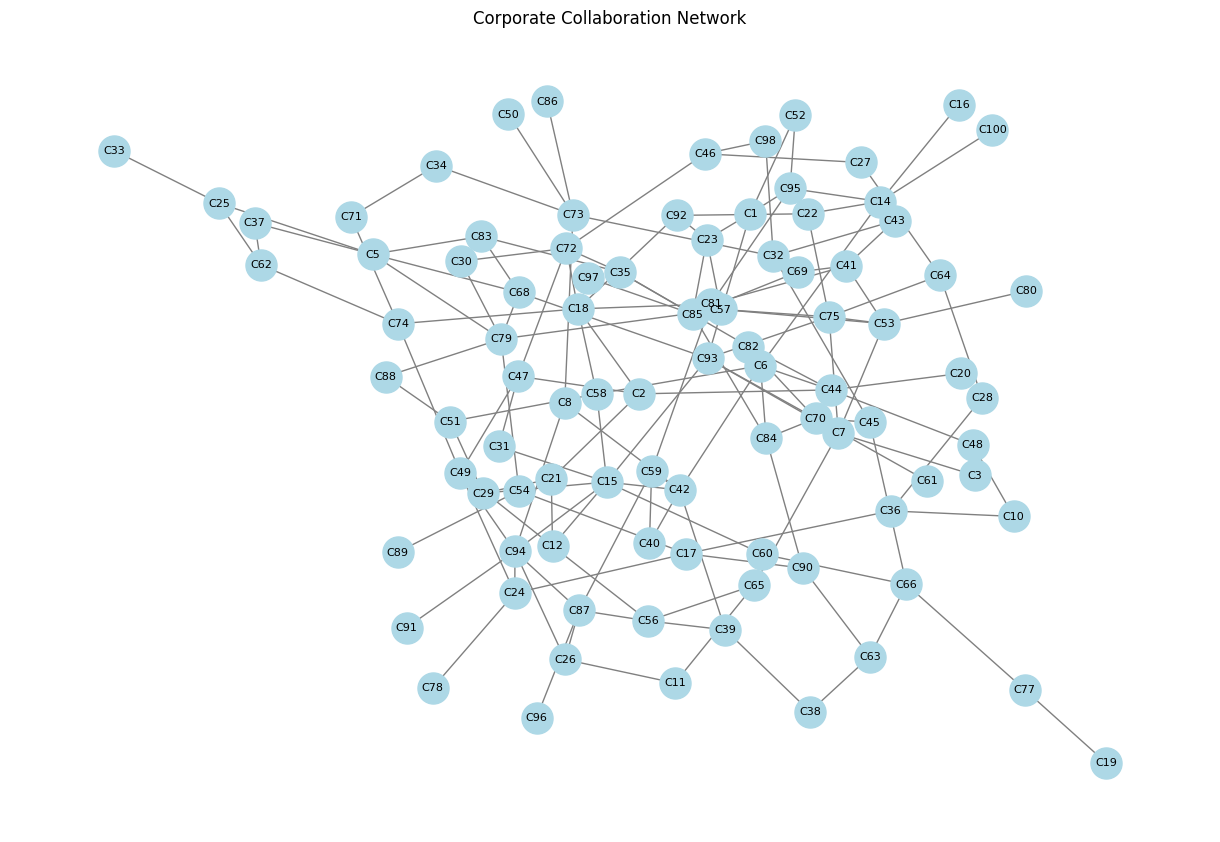

Matrice d'adjacence:
 [[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Centralité de vecteurs propres - Min: 0.0022913911918650116 Noeud: C19
Centralité de vecteurs propres - Max: 0.3238047716019434 Noeud: C15
Centralité de vecteurs propres - Moyenne: 0.08228555754933575
Noeud dont la centralité est la plus proche de la moyenne: C40 avec une centralité de: 0.08237016844260343


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Données du réseau "Corporate Collaboration Network"
edges = [
    ("C18", "C72"), ("C79", "C88"), ("C18", "C81"), ("C1", "C95"), ("C26", "C94"),
    ("C15", "C94"), ("C61", "C70"), ("C70", "C82"), ("C39", "C42"), ("C8", "C73"),
    ("C14", "C22"), ("C5", "C83"), ("C31", "C47"), ("C14", "C95"), ("C15", "C60"),
    ("C40", "C59"), ("C5", "C37"), ("C57", "C75"), ("C35", "C72"), ("C7", "C65"),
    ("C18", "C74"), ("C26", "C87"), ("C6", "C84"), ("C62", "C74"), ("C10", "C36"),
    ("C53", "C80"), ("C54", "C79"), ("C42", "C59"), ("C18", "C92"), ("C22", "C92"),
    ("C41", "C81"), ("C18", "C58"), ("C35", "C83"), ("C46", "C98"), ("C38", "C39"),
    ("C56", "C87"), ("C68", "C79"), ("C12", "C56"), ("C53", "C57"), ("C35", "C85"),
    ("C24", "C94"), ("C53", "C75"), ("C64", "C75"), ("C34", "C71"), ("C28", "C64"),
    ("C5", "C25"), ("C20", "C44"), ("C32", "C73"), ("C7", "C53"), ("C12", "C49"),
    ("C24", "C78"), ("C71", "C74"), ("C68", "C93"), ("C34", "C73"), ("C2", "C47"),
    ("C12", "C15"), ("C41", "C69"), ("C69", "C85"), ("C70", "C84"), ("C66", "C77"),
    ("C70", "C93"), ("C1", "C23"), ("C25", "C33"), ("C45", "C66"), ("C37", "C62"),
    ("C47", "C72"), ("C63", "C90"), ("C41", "C53"), ("C60", "C66"), ("C21", "C29"),
    ("C40", "C42"), ("C29", "C51"), ("C38", "C63"), ("C6", "C58"), ("C19", "C77"),
    ("C35", "C82"), ("C7", "C75"), ("C57", "C79"), ("C32", "C98"), ("C3", "C7"),
    ("C22", "C75"), ("C32", "C43"), ("C54", "C89"), ("C5", "C68"), ("C14", "C16"),
    ("C84", "C90"), ("C6", "C42"), ("C23", "C92"), ("C30", "C79"), ("C46", "C72"),
    ("C28", "C36"), ("C47", "C49"), ("C27", "C46"), ("C17", "C36"), ("C85", "C97"),
    ("C8", "C42"), ("C17", "C54"), ("C45", "C70"), ("C15", "C29"), ("C32", "C45"),
    ("C15", "C93"), ("C51", "C58"), ("C12", "C21"), ("C23", "C85"), ("C6", "C44"),
    ("C59", "C81"), ("C30", "C72"), ("C51", "C88"), ("C68", "C83"), ("C15", "C31"),
    ("C84", "C85"), ("C81", "C95"), ("C15", "C58"), ("C44", "C82"), ("C2", "C21"),
    ("C56", "C65"), ("C41", "C43"), ("C44", "C48"), ("C15", "C42"), ("C7", "C93"),
    ("C1", "C52"), ("C50", "C73"), ("C25", "C62"), ("C17", "C24"), ("C11", "C26"),
    ("C8", "C94"), ("C75", "C93"), ("C49", "C74"), ("C6", "C14"), ("C73", "C86"),
    ("C10", "C48"), ("C27", "C64"), ("C2", "C44"), ("C87", "C94"), ("C59", "C87"),
    ("C11", "C65"), ("C5", "C79"), ("C22", "C95"), ("C39", "C56"), ("C91", "C94"),
    ("C17", "C90"), ("C14", "C100"), ("C63", "C66"), ("C23", "C57"), ("C1", "C93"),
    ("C49", "C94"), ("C24", "C49"), ("C87", "C96"), ("C2", "C18"), ("C52", "C95")
]

# Création du graphe
G = nx.Graph()
G.add_edges_from(edges)

# Tracer le réseau
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Positionnement des nœuds
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=8)
plt.title("Corporate Collaboration Network")
plt.show()

# Extraction de la matrice d'adjacence
adj_matrix = nx.adjacency_matrix(G).todense()
print("Matrice d'adjacence:\n", adj_matrix)

# Calcul de la centralité des vecteurs propres
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
centrality_values = list(eigenvector_centrality.values())

# Résultats
min_centrality_node = min(eigenvector_centrality, key=eigenvector_centrality.get)
max_centrality_node = max(eigenvector_centrality, key=eigenvector_centrality.get)
mean_centrality = np.mean(centrality_values)

# Trouver le nœud dont la centralité est la plus proche de la moyenne
closest_to_mean_node = min(eigenvector_centrality, key=lambda node: abs(eigenvector_centrality[node] - mean_centrality))

print("Centralité de vecteurs propres - Min:", eigenvector_centrality[min_centrality_node], "Noeud:", min_centrality_node)
print("Centralité de vecteurs propres - Max:", eigenvector_centrality[max_centrality_node], "Noeud:", max_centrality_node)
print("Centralité de vecteurs propres - Moyenne:", mean_centrality)
print("Noeud dont la centralité est la plus proche de la moyenne:", closest_to_mean_node, "avec une centralité de:", eigenvector_centrality[closest_to_mean_node])


la centralité des vecteurs propres pour Une communauté régionale de jeux en ligne avec des joueurs et des connexions de jeu.

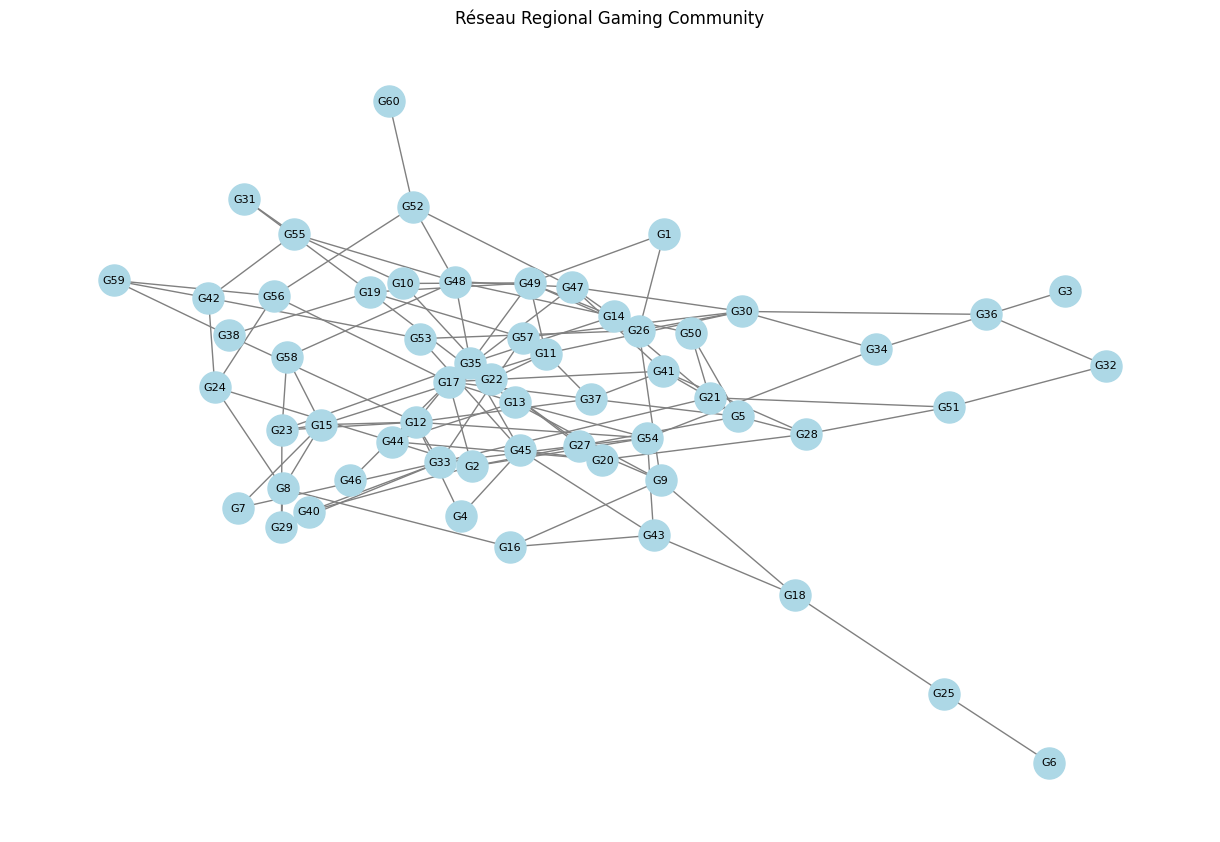

Matrice d'adjacence:
 [[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Centralité de vecteurs propres :
Min : 0.0017 (Noeuds : ['G6'])
Max : 0.3131 (Noeuds : ['G12'])
Moyenne : 0.1106 (Noeuds : [])


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Données du réseau "regional_gaming_community"
edges = [
    ("G26", "G30"), ("G24", "G42"), ("G1", "G49"), ("G5", "G28"), ("G9", "G26"), ("G5", "G37"),
    ("G14", "G49"), ("G13", "G17"), ("G15", "G23"), ("G28", "G51"), ("G13", "G44"), ("G24", "G44"),
    ("G42", "G59"), ("G20", "G22"), ("G19", "G57"), ("G30", "G57"), ("G5", "G21"), ("G26", "G53"),
    ("G12", "G54"), ("G13", "G19"), ("G47", "G48"), ("G1", "G26"), ("G33", "G40"), ("G27", "G54"),
    ("G11", "G37"), ("G23", "G29"), ("G14", "G26"), ("G48", "G58"), ("G21", "G41"), ("G12", "G38"),
    ("G14", "G35"), ("G21", "G50"), ("G10", "G22"), ("G45", "G53"), ("G30", "G34"), ("G17", "G46"),
    ("G2", "G27"), ("G10", "G49"), ("G2", "G54"), ("G20", "G44"), ("G38", "G59"), ("G4", "G45"),
    ("G30", "G36"), ("G47", "G52"), ("G12", "G15"), ("G20", "G28"), ("G52", "G60"), ("G14", "G21"),
    ("G12", "G33"), ("G9", "G16"), ("G27", "G33"), ("G8", "G29"), ("G28", "G41"), ("G19", "G38"),
    ("G17", "G41"), ("G30", "G47"), ("G2", "G40"), ("G12", "G17"), ("G29", "G33"), ("G23", "G35"),
    ("G27", "G35"), ("G19", "G31"), ("G56", "G59"), ("G5", "G50"), ("G19", "G49"), ("G35", "G48"),
    ("G12", "G37"), ("G8", "G15"), ("G8", "G24"), ("G2", "G17"), ("G23", "G58"), ("G32", "G36"),
    ("G43", "G45"), ("G18", "G25"), ("G43", "G54"), ("G21", "G33"), ("G18", "G43"), ("G5", "G27"),
    ("G37", "G41"), ("G11", "G22"), ("G34", "G54"), ("G31", "G55"), ("G17", "G47"), ("G17", "G56"),
    ("G11", "G49"), ("G12", "G23"), ("G26", "G49"), ("G15", "G58"), ("G48", "G55"), ("G9", "G18"),
    ("G11", "G15"), ("G9", "G27"), ("G12", "G44"), ("G4", "G12"), ("G35", "G45"), ("G10", "G55"),
    ("G13", "G54"), ("G33", "G57"), ("G3", "G34"), ("G32", "G51"), ("G42", "G53"), ("G2", "G44"),
    ("G16", "G43"), ("G24", "G56"), ("G48", "G50"), ("G9", "G13"), ("G21", "G51"), ("G7", "G15"),
    ("G41", "G47"), ("G6", "G25"), ("G52", "G56"), ("G42", "G55"), ("G7", "G33"), ("G35", "G49"),
    ("G14", "G47"), ("G8", "G16"), ("G48", "G52"), ("G20", "G45"), ("G17", "G37"), ("G11", "G30")
]

# Création du graphe
G = nx.Graph()
G.add_edges_from(edges)

# Tracer le réseau
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=8)
plt.title("Réseau Regional Gaming Community")
plt.show()

# Extraction de la matrice d'adjacence
adj_matrix = nx.adjacency_matrix(G).todense()
print("Matrice d'adjacence:\n", adj_matrix)

# Calcul de la centralité des vecteurs propres
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
centrality_values = list(eigenvector_centrality.values())

# Résultats
min_value = np.min(centrality_values)
max_value = np.max(centrality_values)
mean_value = np.mean(centrality_values)

# Trouver les noeuds correspondants aux valeurs min, max, et moyenne
min_nodes = [node for node, value in eigenvector_centrality.items() if value == min_value]
max_nodes = [node for node, value in eigenvector_centrality.items() if value == max_value]
mean_nodes = [node for node, value in eigenvector_centrality.items() if np.isclose(value, mean_value)]

# Affichage des résultats
print("\nCentralité de vecteurs propres :")
print(f"Min : {min_value:.4f} (Noeuds : {min_nodes})")
print(f"Max : {max_value:.4f} (Noeuds : {max_nodes})")
print(f"Moyenne : {mean_value:.4f} (Noeuds : {mean_nodes})")


la centralité des vecteurs propres pour Un réseau international de collaboration de recherche regroupant des scientifiques avec des publications communes.

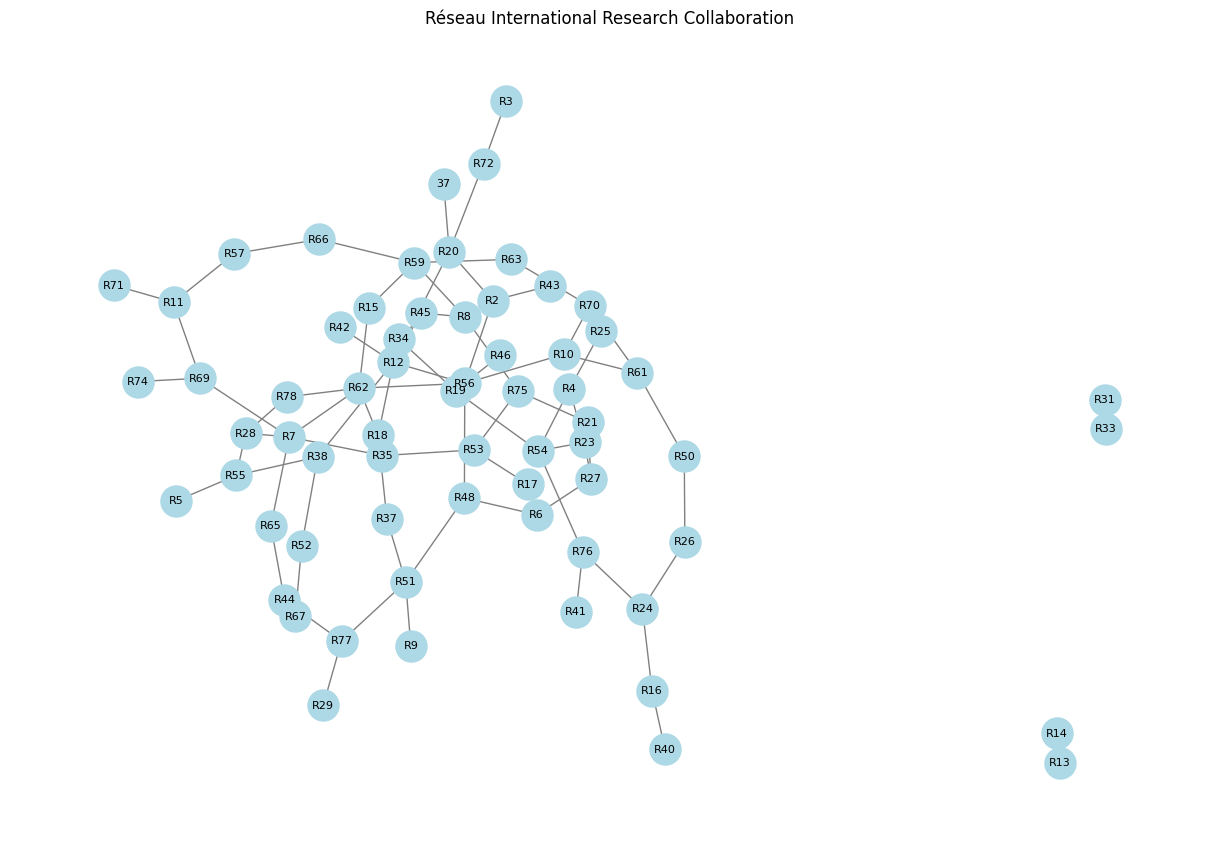

Matrice d'adjacence:
 [[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Centralité de vecteurs propres :
Min : 0.0004
Max : 0.7071
Moyenne : 0.1228
Nœud avec la centralité minimale : R40 (Centralité: 0.0004)
Nœud avec la centralité maximale : R31 (Centralité: 0.7071)
Nœud avec la centralité moyenne la plus proche : R37 (Centralité: 0.1191)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Données du réseau "international_research_collaboration"
edges = [
    ("R50", "R61"), ("R7", "R35"), ("R61", "R70"), ("R18", "R35"), ("R10", "R61"), ("R10", "R70"),
    ("R11", "R69"), ("R6", "R48"), ("R57", "R66"), ("R7", "R65"), ("R24", "R26"), ("R59", "R66"),
    ("R7", "R28"), ("R16", "R40"), ("R18", "R37"), ("R12", "R18"), ("R23", "R27"), ("R8", "R75"),
    ("R28", "R78"), ("R4", "R23"), ("R11", "R71"), ("R38", "R55"), ("R48", "R56"), ("R15", "R62"),
    ("R12", "R45"), ("R44", "R77"), ("R23", "R54"), ("R21", "R75"), ("R16", "R24"), ("R17", "R53"),
    ("R2", "R43"), ("R8", "R59"), ("R10", "R56"), ("R3", "R72"), ("R12", "R20"), ("R31", "R33"),
    ("R4", "R25"), ("R12", "R38"), ("R24", "R76"), ("R12", "R56"), ("R7", "R69"), ("R19", "R34"),
    ("R56", "R62"), ("R62", "R78"), ("R53", "R75"), ("R28", "R55"), ("R20", "R72"), ("R9", "R51"),
    ("R6", "R27"), ("R11", "R57"), ("R69", "R74"), ("R48", "R51"), ("R52", "R67"), ("R51", "R77"),
    ("R41", "R76"), ("R13", "R14"), ("R7", "R62"), ("R18", "R62"), ("R2", "R20"), ("R4", "R54"),
    ("R63", "R70"), ("R37", "R51"), ("R8", "R45"), ("R59", "R63"), ("R29", "R77"), ("R5", "R55"),
    ("R54", "R76"), ("R19", "R54"), ("R21", "R27"), ("R2", "R56"), ("R20", "37"), ("R46", "R56"),
    ("R35", "R53"), ("R38", "R52"), ("R26", "R50"), ("R44", "R65"), ("R12", "R42"), ("R15", "R59"),
    # Plus de données d'arêtes peuvent être ajoutées ici.
]

# Création du graphe
G = nx.Graph()
G.add_edges_from(edges)

# Tracer le réseau
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=8)
plt.title("Réseau International Research Collaboration")
plt.show()

# Extraction de la matrice d'adjacence
adj_matrix = nx.adjacency_matrix(G).todense()
print("Matrice d'adjacence:\n", adj_matrix)

# Gestion des graphes non connectés
# On peut calculer la centralité des vecteurs propres pour chaque composant connecté séparément
eigenvector_centrality = {}
for component in nx.connected_components(G):
    subgraph = G.subgraph(component)
    subgraph_centrality = nx.eigenvector_centrality(subgraph)
    for node, centrality in subgraph_centrality.items():
        eigenvector_centrality[node] = centrality

centrality_values = list(eigenvector_centrality.values())

# Calcul des résultats : min, max, moyenne
min_centrality = np.min(centrality_values)
max_centrality = np.max(centrality_values)
mean_centrality = np.mean(centrality_values)

# Identification des nœuds correspondants
min_node = min(eigenvector_centrality, key=eigenvector_centrality.get)
max_node = max(eigenvector_centrality, key=eigenvector_centrality.get)
mean_node = min(eigenvector_centrality, key=lambda k: abs(eigenvector_centrality[k] - mean_centrality))

# Affichage des résultats
print("\nCentralité de vecteurs propres :")
print(f"Min : {min_centrality:.4f}")
print(f"Max : {max_centrality:.4f}")
print(f"Moyenne : {mean_centrality:.4f}")

# Affichage des nœuds associés aux valeurs min, max, moyenne
print(f"Nœud avec la centralité minimale : {min_node} (Centralité: {eigenvector_centrality[min_node]:.4f})")
print(f"Nœud avec la centralité maximale : {max_node} (Centralité: {eigenvector_centrality[max_node]:.4f})")
print(f"Nœud avec la centralité moyenne la plus proche : {mean_node} (Centralité: {eigenvector_centrality[mean_node]:.4f})")


**Centralité 2 : Fin**

# centralité 3: debut

**1_2 Dans cette sous-partie, nous implémentons la méthode des puissances pour calculer la centralité du PageRank des différents noeuds pour $\alpha$ = 1 et $\beta$ = 0.**

In [ ]:
# Dans ce code, nous implémentons la méthode des puissances et l'applicant au réseau 0 pour calculer les valuers du PageRank pour alpha vaut 1 et beta vaut 0

import numpy as np
from prettytable import PrettyTable

# Create the graph
G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
edges = [('A', 'B'), ('A', 'D'), ('A', 'F'),
         ('B', 'C'), ('B', 'E'),
         ('D', 'E'),
         ('F', 'G'), ('F', 'I'),
         ('I', 'H')]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

n = len(nodes)
A = nx.adjacency_matrix(G)
M = A / A.sum(axis=1) # M est la normalisation de la matrice d'adjacence A pour que la somme de chaque ligne vaut 1
alpha = 1
beta = 0
pagerank_vector = np.ones((n, 1)) / n
# Créer un tableau pour stocker les valeurs du Pagerank à chaque itération
table = PrettyTable()
table.field_names = ['Itération'] + nodes

#  jusqu'à l'itération 2
for iteration in range(1, 7):
    pagerank_vector = alpha * M @ pagerank_vector + beta * (1 / n)
    row_values = [iteration] + [f'{pagerank_vector[i, 0]:.6f}' for i in range(n)]
    table.add_row(row_values)
print(table)

+-----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| Itération |    A     |    B     |    C     |    D     |    E     |    F     |    G     |    H     |    I     |
+-----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|     1     | 0.129630 | 0.203704 | 0.037037 | 0.092593 | 0.092593 | 0.203704 | 0.037037 | 0.055556 | 0.148148 |
|     2     | 0.182099 | 0.126543 | 0.067901 | 0.089506 | 0.114198 | 0.154321 | 0.067901 | 0.074074 | 0.123457 |
|     3     | 0.138374 | 0.185700 | 0.042181 | 0.117798 | 0.086934 | 0.190329 | 0.051440 | 0.061728 | 0.125514 |
|     4     | 0.184242 | 0.131773 | 0.061900 | 0.089592 | 0.120799 | 0.160322 | 0.063443 | 0.062757 | 0.125171 |
|     5     | 0.142161 | 0.183713 | 0.043924 | 0.121814 | 0.088720 | 0.187443 | 0.053441 | 0.062586 | 0.116198 |
|     6     | 0.184626 | 0.135671 | 0.061238 | 0.091747 | 0.122145 | 0.158927 | 0.062481 | 0.058

 Dans cette sous-partie, nous utilisons l'expression algébrique pour calculer la centralité du PageRank des différents noeuds pour  α  = 0.85 et  β  =1.

In [ ]:
import networkx as nx
import numpy as np


# Créer de nouveau le graphe du réseau 0
G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
edges = [('A', 'B'), ('A', 'D'), ('A', 'F'),
         ('B', 'C'), ('B', 'E'),
         ('D', 'E'),
         ('F', 'G'), ('F', 'I'),
         ('I', 'H')]
G.add_nodes_from(nodes)
G.add_edges_from(edges)


A = nx.adjacency_matrix(G) # A est la matrice d'adjacence du graphe G
D = np.diag(list(dict(G.degree()).values())) # D est la matrice diagonale qui contient les dégrés de chaque noeud du graphe G


beta = 1

alpha = 0.85

I = np.eye(len(nodes)) # Matrice identité


M = np.linalg.inv(I - alpha * (np.transpose(A) @ np.linalg.inv(D)))
P = beta * M

pagerank_vector = []

for i in range (len(nodes)):
  S = 0
  for j in range (len(nodes)):
    S += P[i][j]
  pagerank_vector.append(S)

i=0
for node in nodes:
  print (node, ":", pagerank_vector[i])
  i = i+1


A : 9.15056407483829
B : 9.397704812491918
C : 3.6626830302060434
D : 6.284424236816782
E : 6.333563330853176
F : 9.942355567006281
G : 3.817000743985113
H : 4.105245113414751
I : 7.306459090387651


In [ ]:
# Calcul des scores de PageRank
pagerank_vector = []
for i in range(len(nodes)):
    S = 0
    for j in range(len(nodes)):
        S += P[i][j]
    pagerank_vector.append(S)

# Affichage des résultats initiaux
for i, node in enumerate(nodes):
    print(f"{node} : {pagerank_vector[i]:.6f}")

# Trouver les nœuds avec les scores maximaux, minimaux, et proches de la moyenne
max_rank = max(pagerank_vector)
min_rank = min(pagerank_vector)
mean_rank = np.mean(pagerank_vector)

# Nœuds avec le rang maximal
nodes_with_max_rank = [nodes[i] for i, rank in enumerate(pagerank_vector) if rank == max_rank]

# Nœuds avec le rang minimal
nodes_with_min_rank = [nodes[i] for i, rank in enumerate(pagerank_vector) if rank == min_rank]

# Nœuds avec le rang proche de la moyenne (tolérance de 10% de la moyenne)
tolerance = 0.1 * mean_rank
nodes_with_mean_rank = [nodes[i] for i, rank in enumerate(pagerank_vector) if abs(rank - mean_rank) <= tolerance]

# Affichage des nœuds
print("\nNœuds avec le rang maximal:")
print(f"{nodes_with_max_rank}, Score: {max_rank:.6f}")

print("\nNœuds avec le rang minimal:")
print(f"{nodes_with_min_rank}, Score: {min_rank:.6f}")

print("\nNœuds avec le rang proche de la moyenne:")
print(f"{nodes_with_mean_rank}, Score moyen: {mean_rank:.6f}")


A : 9.150564
B : 9.397705
C : 3.662683
D : 6.284424
E : 6.333563
F : 9.942356
G : 3.817001
H : 4.105245
I : 7.306459

Nœuds avec le rang maximal:
['F'], Score: 9.942356

Nœuds avec le rang minimal:
['C'], Score: 3.662683

Nœuds avec le rang proche de la moyenne:
['D', 'E', 'I'], Score moyen: 6.666667


 1-a-iii) Ensuite, nous utilisons la même méthode et donc le même code pour calculer la centralité du PageRank des différents noeuds pour  α  = 0 et  β  = 1

In [ ]:
# Dans ce code, nous implémentons la méthode des puissances et l'applicant au réseau 0 pour calculer les valuers du PageRank pour alpha vaut 1 et beta vaut 0

import numpy as np
from prettytable import PrettyTable

# Create the graph
G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
edges = [('A', 'B'), ('A', 'D'), ('A', 'F'),
         ('B', 'C'), ('B', 'E'),
         ('D', 'E'),
         ('F', 'G'), ('F', 'I'),
         ('I', 'H')]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

n = len(nodes)
A = nx.adjacency_matrix(G)
M = A / A.sum(axis=1) # M est la normalisation de la matrice d'adjacence A pour que la somme de chaque ligne vaut 1
alpha = 0
beta = 1
pagerank_vector = np.ones((n, 1)) / n
# Créer un tableau pour stocker les valeurs du Pagerank à chaque itération
table = PrettyTable()
table.field_names = ['Itération'] + nodes

#  jusqu'à l'itération 2
for iteration in range(1, 2):
    pagerank_vector = alpha * M @ pagerank_vector + beta * (1 / n)
    row_values = [iteration] + [f'{pagerank_vector[i, 0]:.6f}' for i in range(n)]
    table.add_row(row_values)
print(table)


+-----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| Itération |    A     |    B     |    C     |    D     |    E     |    F     |    G     |    H     |    I     |
+-----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|     1     | 0.111111 | 0.111111 | 0.111111 | 0.111111 | 0.111111 | 0.111111 | 0.111111 | 0.111111 | 0.111111 |
+-----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+


 Ecrire un algorithme pour implémenter le « PageRank » pour n'importe quel
graphe. L'algorithme prend en entrée graphe, α et β, et fournit en sortie les
valeurs « PageRank ».

In [ ]:
import numpy as np

def lire_graphe_depuis_fichier(chemin_fichier):
    """
    Lit un graphe à partir d'un fichier formaté.

    :param chemin_fichier: Chemin du fichier contenant le graphe.
    :return: Liste d'adjacence représentant le graphe.
    """
    with open(chemin_fichier, 'r') as fichier:
        lignes = fichier.readlines()

    # Première ligne : nombre de nœuds et d'arêtes
    nb_noeuds, nb_aretes = lignes[0].strip().split()
    nb_noeuds, nb_aretes = int(nb_noeuds), int(nb_aretes)

    # Initialisation de la liste d'adjacence
    graphe = {}

    # Ajout des arêtes
    for ligne in lignes[1:]:
        source, cible = ligne.strip().split()
        if source not in graphe:
            graphe[source] = []
        if cible not in graphe:
            graphe[cible] = []  # Ajouter le nœud cible même s'il n'a pas de voisins
        graphe[source].append(cible)

    return graphe


In [ ]:

def pagerank(graph, alpha, beta):
    """
    Implémente l'algorithme PageRank.

    :param graph: Liste d'adjacence représentant le graphe (dictionnaire).
    :param alpha: Facteur d'amortissement (0 < alpha < 1), typiquement 0.85.
    :param beta: Seuil de convergence pour les changements de scores entre les itérations.
    :return: Dictionnaire avec les scores de PageRank pour chaque nœud.
    """
    nodes = list(graph.keys())  # Liste des nœuds
    N = len(nodes)             # Nombre total de nœuds

    if N == 0:
        return {}

    # Création d'un dictionnaire pour indexer les nœuds
    node_index = {node: i for i, node in enumerate(nodes)}

    # Matrice de transition
    M = np.zeros((N, N))

    for node, neighbors in graph.items():
        if neighbors:
            for neighbor in neighbors:
                M[node_index[neighbor], node_index[node]] = 1 / len(neighbors)
        else:
            # Cas d'un nœud sans voisins : distribuer également aux autres nœuds
            M[:, node_index[node]] = 1 / N

    # Initialisation des scores PageRank
    pagerank_scores = np.ones(N) / N  # Scores initiaux uniformes
    delta = 1  # Différence initiale pour démarrer l'itération

    while delta > beta:
        # Calcul de la prochaine itération des scores
        new_scores = alpha * np.dot(M, pagerank_scores) + (1 - alpha) / N
        # Vérification de la convergence
        delta = np.linalg.norm(new_scores - pagerank_scores, ord=1)
        pagerank_scores = new_scores

    # Conversion des scores en un dictionnaire
    return {nodes[i]: pagerank_scores[i] for i in range(N)}



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Corporate_collaboration_network.txt

In [ ]:
chemin_fichier = "/content/drive/MyDrive/corporate_collaboration_network.txt"

# Lire le graphe depuis le fichier
graphe = lire_graphe_depuis_fichier(chemin_fichier)

# Paramètres
alpha = 0.85
beta = 1e-6

# Calculer les scores de PageRank
resultats = pagerank(graphe, alpha, beta)

# Afficher les résultats
print("Scores de PageRank :")
for noeud, score in resultats.items():
    print(f"Nœud {noeud} : {score:.6f}")

Scores de PageRank :
Nœud C18 : 0.006545
Nœud C72 : 0.018239
Nœud C79 : 0.017306
Nœud C88 : 0.027001
Nœud C81 : 0.016057
Nœud C1 : 0.005398
Nœud C95 : 0.029008
Nœud C26 : 0.007692
Nœud C94 : 0.032162
Nœud C15 : 0.006545
Nœud C61 : 0.005398
Nœud C70 : 0.012767
Nœud C82 : 0.015284
Nœud C39 : 0.007692
Nœud C42 : 0.014203
Nœud C8 : 0.005398
Nœud C73 : 0.014956
Nœud C14 : 0.006315
Nœud C22 : 0.006740
Nœud C5 : 0.005398
Nœud C83 : 0.009252
Nœud C31 : 0.006192
Nœud C47 : 0.011808
Nœud C60 : 0.006192
Nœud C40 : 0.005398
Nœud C59 : 0.019764
Nœud C37 : 0.006315
Nœud C57 : 0.009708
Nœud C75 : 0.024499
Nœud C35 : 0.005398
Nœud C7 : 0.009986
Nœud C65 : 0.013985
Nœud C74 : 0.030183
Nœud C87 : 0.021237
Nœud C6 : 0.005398
Nœud C84 : 0.009933
Nœud C62 : 0.013450
Nœud C10 : 0.005398
Nœud C36 : 0.011133
Nœud C53 : 0.008667
Nœud C80 : 0.007853
Nœud C54 : 0.006545
Nœud C92 : 0.010274
Nœud C41 : 0.005398
Nœud C58 : 0.015116
Nœud C46 : 0.007692
Nœud C98 : 0.009814
Nœud C38 : 0.005398
Nœud C56 : 0.009814
Nœud

In [ ]:
# Lire le graphe depuis le fichier
graphe = lire_graphe_depuis_fichier(chemin_fichier)

# Paramètres
alpha = 0.85
beta = 1e-6

# Calculer les scores de PageRank
resultats = pagerank(graphe, alpha, beta)

# Afficher les scores de PageRank
print("Scores de PageRank :")
for noeud, score in resultats.items():
    print(f"Nœud {noeud} : {score:.6f}")

# Calcul des scores maximaux, minimaux et de la moyenne
max_rank = max(resultats.values())
min_rank = min(resultats.values())
mean_rank = np.mean(list(resultats.values()))

# Trouver les nœuds correspondants
nodes_with_max_rank = [noeud for noeud, score in resultats.items() if score == max_rank]
nodes_with_min_rank = [noeud for noeud, score in resultats.items() if score == min_rank]

# Tolérance pour les nœuds proches de la moyenne (10% de la moyenne)
tolerance = 0.1 * mean_rank
nodes_with_mean_rank = [noeud for noeud, score in resultats.items() if abs(score - mean_rank) <= tolerance]

# Affichage des résultats
print("\nNœuds avec le rang maximal:")
print(f"{nodes_with_max_rank}, Score: {max_rank:.6f}")

print("\nNœuds avec le rang minimal:")
print(f"{nodes_with_min_rank}, Score: {min_rank:.6f}")

print("\nNœuds avec le rang proche de la moyenne:")
print(f"{nodes_with_mean_rank}, Score moyen: {mean_rank:.6f}")


Scores de PageRank :
Nœud C18 : 0.006545
Nœud C72 : 0.018239
Nœud C79 : 0.017306
Nœud C88 : 0.027001
Nœud C81 : 0.016057
Nœud C1 : 0.005398
Nœud C95 : 0.029008
Nœud C26 : 0.007692
Nœud C94 : 0.032162
Nœud C15 : 0.006545
Nœud C61 : 0.005398
Nœud C70 : 0.012767
Nœud C82 : 0.015284
Nœud C39 : 0.007692
Nœud C42 : 0.014203
Nœud C8 : 0.005398
Nœud C73 : 0.014956
Nœud C14 : 0.006315
Nœud C22 : 0.006740
Nœud C5 : 0.005398
Nœud C83 : 0.009252
Nœud C31 : 0.006192
Nœud C47 : 0.011808
Nœud C60 : 0.006192
Nœud C40 : 0.005398
Nœud C59 : 0.019764
Nœud C37 : 0.006315
Nœud C57 : 0.009708
Nœud C75 : 0.024499
Nœud C35 : 0.005398
Nœud C7 : 0.009986
Nœud C65 : 0.013985
Nœud C74 : 0.030183
Nœud C87 : 0.021237
Nœud C6 : 0.005398
Nœud C84 : 0.009933
Nœud C62 : 0.013450
Nœud C10 : 0.005398
Nœud C36 : 0.011133
Nœud C53 : 0.008667
Nœud C80 : 0.007853
Nœud C54 : 0.006545
Nœud C92 : 0.010274
Nœud C41 : 0.005398
Nœud C58 : 0.015116
Nœud C46 : 0.007692
Nœud C98 : 0.009814
Nœud C38 : 0.005398
Nœud C56 : 0.009814
Nœud

international_research_collaboration.txt


In [ ]:

chemin_fichier = "/content/drive/MyDrive/international_research_collaboration.txt"

# Lire le graphe depuis le fichier
graphe = lire_graphe_depuis_fichier(chemin_fichier)

# Paramètres
alpha = 0.85
beta = 1e-6

# Calculer les scores de PageRank
resultats = pagerank(graphe, alpha, beta)

# Afficher les résultats
print("Scores de PageRank :")
for noeud, score in resultats.items():
    print(f"Nœud {noeud} : {score:.6f}")


Scores de PageRank :
Nœud R50 : 0.009249
Nœud R61 : 0.011093
Nœud R7 : 0.005530
Nœud R35 : 0.012032
Nœud R70 : 0.022387
Nœud R18 : 0.007792
Nœud R10 : 0.006202
Nœud R11 : 0.005530
Nœud R69 : 0.032328
Nœud R6 : 0.005530
Nœud R48 : 0.009530
Nœud R57 : 0.011099
Nœud R66 : 0.016110
Nœud R65 : 0.011585
Nœud R24 : 0.006470
Nœud R26 : 0.006905
Nœud R59 : 0.007760
Nœud R28 : 0.007945
Nœud R16 : 0.005530
Nœud R40 : 0.011241
Nœud R37 : 0.008629
Nœud R12 : 0.005530
Nœud R23 : 0.007142
Nœud R27 : 0.012089
Nœud R8 : 0.006202
Nœud R75 : 0.041518
Nœud R78 : 0.064388
Nœud R4 : 0.005530
Nœud R71 : 0.022141
Nœud R38 : 0.006901
Nœud R55 : 0.019531
Nœud R56 : 0.026145
Nœud R15 : 0.005530
Nœud R62 : 0.038415
Nœud R45 : 0.007172
Nœud R44 : 0.009903
Nœud R77 : 0.038123
Nœud R54 : 0.010706
Nœud R21 : 0.005530
Nœud R17 : 0.006202
Nœud R53 : 0.017576
Nœud R2 : 0.005530
Nœud R43 : 0.006202
Nœud R3 : 0.006202
Nœud R72 : 0.016658
Nœud R20 : 0.006789
Nœud R31 : 0.005530
Nœud R33 : 0.006470
Nœud R25 : 0.007577
Nœud 

In [ ]:
# Lire le graphe depuis le fichier
graphe = lire_graphe_depuis_fichier(chemin_fichier)

# Paramètres
alpha = 0.85
beta = 1e-6

# Calculer les scores de PageRank
resultats = pagerank(graphe, alpha, beta)

# Afficher les scores de PageRank
print("Scores de PageRank :")
for noeud, score in resultats.items():
    print(f"Nœud {noeud} : {score:.6f}")

# Calcul des scores maximaux, minimaux et de la moyenne
max_rank = max(resultats.values())
min_rank = min(resultats.values())
mean_rank = np.mean(list(resultats.values()))

# Trouver les nœuds correspondants
nodes_with_max_rank = [noeud for noeud, score in resultats.items() if score == max_rank]
nodes_with_min_rank = [noeud for noeud, score in resultats.items() if score == min_rank]

# Tolérance pour les nœuds proches de la moyenne (10% de la moyenne)
tolerance = 0.1 * mean_rank
nodes_with_mean_rank = [noeud for noeud, score in resultats.items() if abs(score - mean_rank) <= tolerance]

# Affichage des résultats
print("\nNœuds avec le rang maximal:")
print(f"{nodes_with_max_rank}, Score: {max_rank:.6f}")

print("\nNœuds avec le rang minimal:")
print(f"{nodes_with_min_rank}, Score: {min_rank:.6f}")

print("\nNœuds avec le rang proche de la moyenne:")
print(f"{nodes_with_mean_rank}, Score moyen: {mean_rank:.6f}")


Scores de PageRank :
Nœud R50 : 0.009249
Nœud R61 : 0.011093
Nœud R7 : 0.005530
Nœud R35 : 0.012032
Nœud R70 : 0.022387
Nœud R18 : 0.007792
Nœud R10 : 0.006202
Nœud R11 : 0.005530
Nœud R69 : 0.032328
Nœud R6 : 0.005530
Nœud R48 : 0.009530
Nœud R57 : 0.011099
Nœud R66 : 0.016110
Nœud R65 : 0.011585
Nœud R24 : 0.006470
Nœud R26 : 0.006905
Nœud R59 : 0.007760
Nœud R28 : 0.007945
Nœud R16 : 0.005530
Nœud R40 : 0.011241
Nœud R37 : 0.008629
Nœud R12 : 0.005530
Nœud R23 : 0.007142
Nœud R27 : 0.012089
Nœud R8 : 0.006202
Nœud R75 : 0.041518
Nœud R78 : 0.064388
Nœud R4 : 0.005530
Nœud R71 : 0.022141
Nœud R38 : 0.006901
Nœud R55 : 0.019531
Nœud R56 : 0.026145
Nœud R15 : 0.005530
Nœud R62 : 0.038415
Nœud R45 : 0.007172
Nœud R44 : 0.009903
Nœud R77 : 0.038123
Nœud R54 : 0.010706
Nœud R21 : 0.005530
Nœud R17 : 0.006202
Nœud R53 : 0.017576
Nœud R2 : 0.005530
Nœud R43 : 0.006202
Nœud R3 : 0.006202
Nœud R72 : 0.016658
Nœud R20 : 0.006789
Nœud R31 : 0.005530
Nœud R33 : 0.006470
Nœud R25 : 0.007577
Nœud 

 regional_gaming_community


In [ ]:
chemin_fichier = "/content/drive/MyDrive/regional_gaming_community.txt"

# Lire le graphe depuis le fichier
graphe = lire_graphe_depuis_fichier(chemin_fichier)

# Paramètres
alpha = 0.85
beta = 1e-6

# Calculer les scores de PageRank
resultats = pagerank(graphe, alpha, beta)

# Afficher les résultats
print("Scores de PageRank :")
for noeud, score in resultats.items():
    print(f"Nœud {noeud} : {score:.6f}")


Scores de PageRank :
Nœud G26 : 0.014292
Nœud G30 : 0.013524
Nœud G24 : 0.009818
Nœud G42 : 0.010879
Nœud G1 : 0.008098
Nœud G49 : 0.027740
Nœud G5 : 0.008098
Nœud G28 : 0.011195
Nœud G9 : 0.008098
Nœud G37 : 0.014238
Nœud G14 : 0.008098
Nœud G13 : 0.009474
Nœud G17 : 0.012713
Nœud G15 : 0.015862
Nœud G23 : 0.016065
Nœud G51 : 0.018603
Nœud G44 : 0.017216
Nœud G59 : 0.043300
Nœud G20 : 0.008098
Nœud G22 : 0.013489
Nœud G19 : 0.010111
Nœud G57 : 0.026189
Nœud G21 : 0.010851
Nœud G53 : 0.038530
Nœud G12 : 0.011539
Nœud G54 : 0.040551
Nœud G47 : 0.039520
Nœud G48 : 0.029849
Nœud G33 : 0.030750
Nœud G40 : 0.022543
Nœud G27 : 0.012227
Nœud G11 : 0.008098
Nœud G29 : 0.014370
Nœud G58 : 0.025734
Nœud G41 : 0.029425
Nœud G38 : 0.011472
Nœud G35 : 0.017490
Nœud G50 : 0.018123
Nœud G10 : 0.008098
Nœud G45 : 0.027412
Nœud G34 : 0.017854
Nœud G46 : 0.010259
Nœud G2 : 0.008098
Nœud G4 : 0.008098
Nœud G36 : 0.014413
Nœud G52 : 0.031237
Nœud G60 : 0.021373
Nœud G16 : 0.011195
Nœud G8 : 0.008098
Nœud 

In [ ]:
# Lire le graphe depuis le fichier
graphe = lire_graphe_depuis_fichier(chemin_fichier)

# Paramètres
alpha = 0.85
beta = 1e-6

# Calculer les scores de PageRank
resultats = pagerank(graphe, alpha, beta)

# Afficher les scores de PageRank
print("Scores de PageRank :")
for noeud, score in resultats.items():
    print(f"Nœud {noeud} : {score:.6f}")

# Calcul des scores maximaux, minimaux et de la moyenne
max_rank = max(resultats.values())
min_rank = min(resultats.values())
mean_rank = np.mean(list(resultats.values()))

# Trouver les nœuds correspondants
nodes_with_max_rank = [noeud for noeud, score in resultats.items() if score == max_rank]
nodes_with_min_rank = [noeud for noeud, score in resultats.items() if score == min_rank]

# Tolérance pour les nœuds proches de la moyenne (10% de la moyenne)
tolerance = 0.1 * mean_rank
nodes_with_mean_rank = [noeud for noeud, score in resultats.items() if abs(score - mean_rank) <= tolerance]

# Affichage des résultats
print("\nNœuds avec le rang maximal:")
print(f"{nodes_with_max_rank}, Score: {max_rank:.6f}")

print("\nNœuds avec le rang minimal:")
print(f"{nodes_with_min_rank}, Score: {min_rank:.6f}")

print("\nNœuds avec le rang proche de la moyenne:")
print(f"{nodes_with_mean_rank}, Score moyen: {mean_rank:.6f}")


Scores de PageRank :
Nœud G26 : 0.014292
Nœud G30 : 0.013524
Nœud G24 : 0.009818
Nœud G42 : 0.010879
Nœud G1 : 0.008098
Nœud G49 : 0.027740
Nœud G5 : 0.008098
Nœud G28 : 0.011195
Nœud G9 : 0.008098
Nœud G37 : 0.014238
Nœud G14 : 0.008098
Nœud G13 : 0.009474
Nœud G17 : 0.012713
Nœud G15 : 0.015862
Nœud G23 : 0.016065
Nœud G51 : 0.018603
Nœud G44 : 0.017216
Nœud G59 : 0.043300
Nœud G20 : 0.008098
Nœud G22 : 0.013489
Nœud G19 : 0.010111
Nœud G57 : 0.026189
Nœud G21 : 0.010851
Nœud G53 : 0.038530
Nœud G12 : 0.011539
Nœud G54 : 0.040551
Nœud G47 : 0.039520
Nœud G48 : 0.029849
Nœud G33 : 0.030750
Nœud G40 : 0.022543
Nœud G27 : 0.012227
Nœud G11 : 0.008098
Nœud G29 : 0.014370
Nœud G58 : 0.025734
Nœud G41 : 0.029425
Nœud G38 : 0.011472
Nœud G35 : 0.017490
Nœud G50 : 0.018123
Nœud G10 : 0.008098
Nœud G45 : 0.027412
Nœud G34 : 0.017854
Nœud G46 : 0.010259
Nœud G2 : 0.008098
Nœud G4 : 0.008098
Nœud G36 : 0.014413
Nœud G52 : 0.031237
Nœud G60 : 0.021373
Nœud G16 : 0.011195
Nœud G8 : 0.008098
Nœud 

university_students_projects

In [ ]:

chemin_fichier = "/content/drive/MyDrive/university_students_projects.txt"

# Lire le graphe depuis le fichier
graphe = lire_graphe_depuis_fichier(chemin_fichier)

# Paramètres
alpha = 0.85
beta = 1e-6

# Calculer les scores de PageRank
resultats = pagerank(graphe, alpha, beta)

# Afficher les résultats
print("Scores de PageRank :")
for noeud, score in resultats.items():
    print(f"Nœud {noeud} : {score:.6f}")

Scores de PageRank :
Nœud U13 : 0.012282
Nœud U42 : 0.035570
Nœud U26 : 0.009570
Nœud U39 : 0.033367
Nœud U8 : 0.012282
Nœud U18 : 0.013344
Nœud U14 : 0.010926
Nœud U31 : 0.013055
Nœud U22 : 0.009570
Nœud U44 : 0.016583
Nœud U49 : 0.081461
Nœud U7 : 0.009570
Nœud U19 : 0.017890
Nœud U2 : 0.009570
Nœud U32 : 0.021141
Nœud U1 : 0.009570
Nœud U3 : 0.009570
Nœud U6 : 0.009570
Nœud U4 : 0.009570
Nœud U50 : 0.105590
Nœud U25 : 0.018207
Nœud U27 : 0.014729
Nœud U10 : 0.009570
Nœud U38 : 0.019027
Nœud U34 : 0.028941
Nœud U45 : 0.038592
Nœud U20 : 0.021919
Nœud U33 : 0.032179
Nœud U48 : 0.052579
Nœud U21 : 0.011310
Nœud U43 : 0.016744
Nœud U16 : 0.013344
Nœud U17 : 0.020913
Nœud U40 : 0.026952
Nœud U47 : 0.033742
Nœud U15 : 0.012824
Nœud U11 : 0.014316
Nœud U46 : 0.009570
Nœud U41 : 0.033601
Nœud U9 : 0.009570
Nœud U30 : 0.009570
Nœud U29 : 0.012960
Nœud U24 : 0.015131
Nœud U36 : 0.017705
Nœud U37 : 0.015495
Nœud U28 : 0.021317
Nœud U35 : 0.009570
Nœud U23 : 0.009570


In [ ]:
# Lire le graphe depuis le fichier
graphe = lire_graphe_depuis_fichier(chemin_fichier)

# Paramètres
alpha = 0.85
beta = 1e-6

# Calculer les scores de PageRank
resultats = pagerank(graphe, alpha, beta)

# Afficher les scores de PageRank
print("Scores de PageRank :")
for noeud, score in resultats.items():
    print(f"Nœud {noeud} : {score:.6f}")

# Calcul des scores maximaux, minimaux et de la moyenne
max_rank = max(resultats.values())
min_rank = min(resultats.values())
mean_rank = np.mean(list(resultats.values()))

# Trouver les nœuds correspondants
nodes_with_max_rank = [noeud for noeud, score in resultats.items() if score == max_rank]
nodes_with_min_rank = [noeud for noeud, score in resultats.items() if score == min_rank]

# Tolérance pour les nœuds proches de la moyenne (10% de la moyenne)
tolerance = 0.1 * mean_rank
nodes_with_mean_rank = [noeud for noeud, score in resultats.items() if abs(score - mean_rank) <= tolerance]

# Affichage des résultats
print("\nNœuds avec le rang maximal:")
print(f"{nodes_with_max_rank}, Score: {max_rank:.6f}")

print("\nNœuds avec le rang minimal:")
print(f"{nodes_with_min_rank}, Score: {min_rank:.6f}")

print("\nNœuds avec le rang proche de la moyenne:")
print(f"{nodes_with_mean_rank}, Score moyen: {mean_rank:.6f}")


Scores de PageRank :
Nœud U13 : 0.012282
Nœud U42 : 0.035570
Nœud U26 : 0.009570
Nœud U39 : 0.033367
Nœud U8 : 0.012282
Nœud U18 : 0.013344
Nœud U14 : 0.010926
Nœud U31 : 0.013055
Nœud U22 : 0.009570
Nœud U44 : 0.016583
Nœud U49 : 0.081461
Nœud U7 : 0.009570
Nœud U19 : 0.017890
Nœud U2 : 0.009570
Nœud U32 : 0.021141
Nœud U1 : 0.009570
Nœud U3 : 0.009570
Nœud U6 : 0.009570
Nœud U4 : 0.009570
Nœud U50 : 0.105590
Nœud U25 : 0.018207
Nœud U27 : 0.014729
Nœud U10 : 0.009570
Nœud U38 : 0.019027
Nœud U34 : 0.028941
Nœud U45 : 0.038592
Nœud U20 : 0.021919
Nœud U33 : 0.032179
Nœud U48 : 0.052579
Nœud U21 : 0.011310
Nœud U43 : 0.016744
Nœud U16 : 0.013344
Nœud U17 : 0.020913
Nœud U40 : 0.026952
Nœud U47 : 0.033742
Nœud U15 : 0.012824
Nœud U11 : 0.014316
Nœud U46 : 0.009570
Nœud U41 : 0.033601
Nœud U9 : 0.009570
Nœud U30 : 0.009570
Nœud U29 : 0.012960
Nœud U24 : 0.015131
Nœud U36 : 0.017705
Nœud U37 : 0.015495
Nœud U28 : 0.021317
Nœud U35 : 0.009570
Nœud U23 : 0.009570

Nœuds avec le rang maximal

village_friendship_network

In [ ]:

chemin_fichier = "/content/drive/MyDrive/village_friendship_network.txt"

# Lire le graphe depuis le fichier
graphe = lire_graphe_depuis_fichier(chemin_fichier)

# Paramètres
alpha = 0.85
beta = 1e-6

# Calculer les scores de PageRank
resultats = pagerank(graphe, alpha, beta)

# Afficher les résultats
print("Scores de PageRank :")
for noeud, score in resultats.items():
    print(f"Nœud {noeud} : {score:.6f}")


Scores de PageRank :
Nœud V6 : 0.026032
Nœud V15 : 0.044471
Nœud V4 : 0.026032
Nœud V9 : 0.070125
Nœud V12 : 0.048158
Nœud V16 : 0.161530
Nœud V5 : 0.026032
Nœud V13 : 0.056964
Nœud V8 : 0.071023
Nœud V1 : 0.026032
Nœud V3 : 0.033407
Nœud V2 : 0.026032
Nœud V10 : 0.026032
Nœud V20 : 0.087181
Nœud V17 : 0.060906
Nœud V14 : 0.031563
Nœud V18 : 0.052860
Nœud V19 : 0.073559
Nœud V11 : 0.026032
Nœud V7 : 0.026032


In [ ]:
# Lire le graphe depuis le fichier
graphe = lire_graphe_depuis_fichier(chemin_fichier)

# Paramètres
alpha = 0.85
beta = 1e-6

# Calculer les scores de PageRank
resultats = pagerank(graphe, alpha, beta)

# Afficher les scores de PageRank
print("Scores de PageRank :")
for noeud, score in resultats.items():
    print(f"Nœud {noeud} : {score:.6f}")

# Calcul des scores maximaux, minimaux et de la moyenne
max_rank = max(resultats.values())
min_rank = min(resultats.values())
mean_rank = np.mean(list(resultats.values()))

# Trouver les nœuds correspondants
nodes_with_max_rank = [noeud for noeud, score in resultats.items() if score == max_rank]
nodes_with_min_rank = [noeud for noeud, score in resultats.items() if score == min_rank]

# Tolérance pour les nœuds proches de la moyenne (10% de la moyenne)
tolerance = 0.1 * mean_rank
nodes_with_mean_rank = [noeud for noeud, score in resultats.items() if abs(score - mean_rank) <= tolerance]

# Affichage des résultats
print("\nNœuds avec le rang maximal:")
print(f"{nodes_with_max_rank}, Score: {max_rank:.6f}")

print("\nNœuds avec le rang minimal:")
print(f"{nodes_with_min_rank}, Score: {min_rank:.6f}")

print("\nNœuds avec le rang proche de la moyenne:")
print(f"{nodes_with_mean_rank}, Score moyen: {mean_rank:.6f}")


Scores de PageRank :
Nœud V6 : 0.026032
Nœud V15 : 0.044471
Nœud V4 : 0.026032
Nœud V9 : 0.070125
Nœud V12 : 0.048158
Nœud V16 : 0.161530
Nœud V5 : 0.026032
Nœud V13 : 0.056964
Nœud V8 : 0.071023
Nœud V1 : 0.026032
Nœud V3 : 0.033407
Nœud V2 : 0.026032
Nœud V10 : 0.026032
Nœud V20 : 0.087181
Nœud V17 : 0.060906
Nœud V14 : 0.031563
Nœud V18 : 0.052860
Nœud V19 : 0.073559
Nœud V11 : 0.026032
Nœud V7 : 0.026032

Nœuds avec le rang maximal:
['V16'], Score: 0.161530

Nœuds avec le rang minimal:
['V6', 'V4', 'V5', 'V1', 'V2', 'V10', 'V11', 'V7'], Score: 0.026032

Nœuds avec le rang proche de la moyenne:
['V12', 'V18'], Score moyen: 0.050000


# Fin centralité 3

# Début  Centralité 4 d’intermédiarité

2.a.L'algorithme pour calculer le nombre de plus court chemin entre deux nœuds

Visualisation du graphe utilisé :


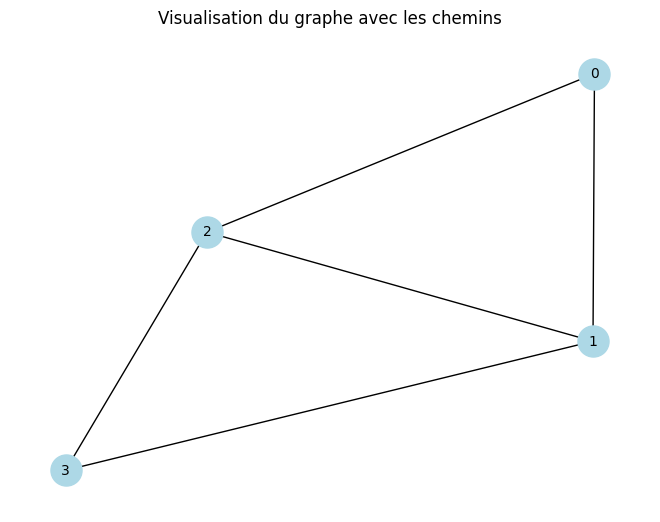

Nombre de plus courts chemins entre les nœuds 0 et 3 : 2
Les plus courts chemins sont :
0 -> 1 -> 3
0 -> 2 -> 3
Visualisation des chemins les plus courts dans le graphe :


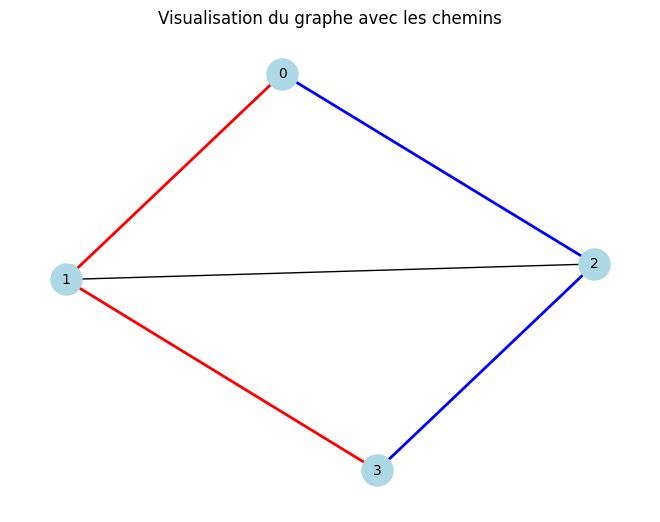

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def draw_graph(graph, highlight_paths=None):
    """
    Affiche le graphe en utilisant NetworkX et Matplotlib avec des chemins mis en évidence.

    Args:
        graph: dict, le graphe sous forme de liste d'adjacence.
        highlight_paths: list of lists, les chemins à mettre en évidence (facultatif).
    """
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G)  # Positionnement des nœuds
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)

    # Ajouter des couleurs différentes pour chaque chemin
    if highlight_paths:
        colors = ['red', 'blue', 'green', 'orange', 'purple']  # Liste de couleurs
        for i, path in enumerate(highlight_paths):
            edges = [(path[j], path[j + 1]) for j in range(len(path) - 1)]
            nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors[i % len(colors)], width=2)

    plt.title("Visualisation du graphe avec les chemins")
    plt.show()

def shortest_paths(graph, source, target):
    """
    Trouver tous les plus courts chemins entre deux nœuds.

    Args:
        graph: dict, le graphe sous forme de liste d'adjacence.
        source: int, le nœud source.
        target: int, le nœud cible.

    Returns:
        paths: list of list, les chemins les plus courts.
        path_count: int, le nombre de ces chemins.
    """
    # Initialisation
    queue = deque([[source]])  # Chaque élément est un chemin en cours d'exploration
    distances = {node: float('inf') for node in graph}
    distances[source] = 0
    paths = []  # Liste des chemins les plus courts trouvés
    shortest_length = float('inf')  # Longueur des plus courts chemins

    while queue:
        # Extraire un chemin de la file
        current_path = queue.popleft()
        current_node = current_path[-1]

        # Si on atteint le nœud cible
        if current_node == target:
            if len(current_path) <= shortest_length:
                if len(current_path) < shortest_length:
                    # Si on trouve un chemin plus court, on réinitialise
                    paths = []
                    shortest_length = len(current_path)
                paths.append(current_path)
            continue

        # Parcourir les voisins du nœud actuel
        for neighbor in graph[current_node]:
            if distances[neighbor] >= distances[current_node] + 1:
                distances[neighbor] = distances[current_node] + 1
                # Ajouter un nouveau chemin potentiel à la file
                queue.append(current_path + [neighbor])

    return paths, len(paths)

# Exemple de graphe
graph = {
    0: [1, 2],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [1, 2],
}

# Afficher le graphe
print("Visualisation du graphe utilisé :")
draw_graph(graph)

# Application : Calcul des plus courts chemins entre deux nœuds
source_node = 0
target_node = 3

# Appeler la fonction pour trouver les plus courts chemins
shortest_paths_list, num_shortest_paths = shortest_paths(graph, source_node, target_node)

# Afficher les résultats
print(f"Nombre de plus courts chemins entre les nœuds {source_node} et {target_node} : {num_shortest_paths}")
print("Les plus courts chemins sont :")
for path in shortest_paths_list:
    print(" -> ".join(map(str, path)))

# Visualiser les chemins les plus courts
if num_shortest_paths > 0:
    print("Visualisation des chemins les plus courts dans le graphe :")
    draw_graph(graph, highlight_paths=shortest_paths_list)


2.b. L'algorithme pour calculer le nombre de plus court chemin entre deux nœuds et qui passe par un autre nœud

Visualisation du graphe utilisé :


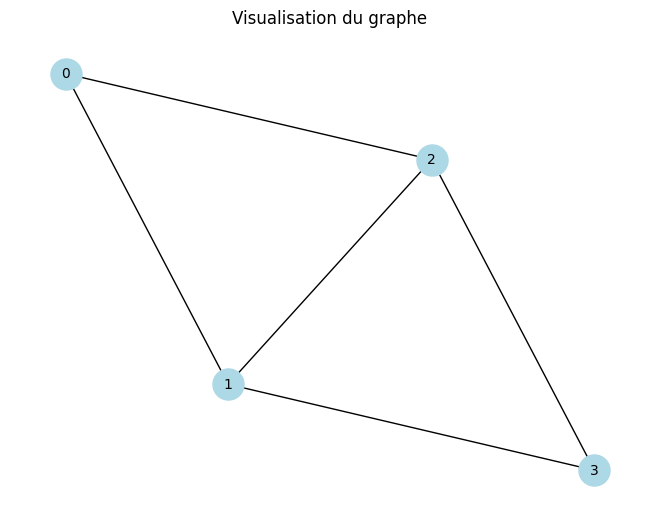

Nombre de plus courts chemins entre 0 et 3 passant par 1 : 1
Les chemins sont :
0 -> 1 -> 3


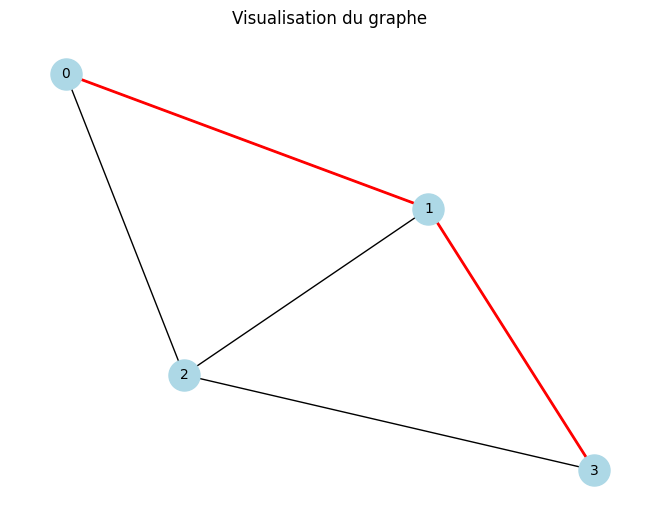

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def draw_graph(graph, highlight_path=None):
    """
    Affiche le graphe en utilisant NetworkX et Matplotlib.

    Args:
        graph: dict, le graphe sous forme de liste d'adjacence.
        highlight_path: list, un chemin à mettre en évidence (facultatif).
    """
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G)  # Positionnement des nœuds
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)

    if highlight_path:
        edges = [(highlight_path[i], highlight_path[i+1]) for i in range(len(highlight_path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=2)

    plt.title("Visualisation du graphe")
    plt.show()

def shortest_paths_count(graph, source, target):
    """
    Trouver le nombre de plus courts chemins entre deux nœuds.
    """
    queue = deque([source])
    distances = {node: float('inf') for node in graph}
    distances[source] = 0
    path_count = {node: 0 for node in graph}
    path_count[source] = 1

    while queue:
        current = queue.popleft()
        for neighbor in graph[current]:
            if distances[neighbor] > distances[current] + 1:
                distances[neighbor] = distances[current] + 1
                path_count[neighbor] = path_count[current]
                queue.append(neighbor)
            elif distances[neighbor] == distances[current] + 1:
                path_count[neighbor] += path_count[current]

    return path_count[target], distances[target]

def shortest_paths_through_node(graph, source, target, node_v):
    """
    Calculer le nombre de plus courts chemins entre source et target passant par un nœud v.
    """
    if source == node_v or target == node_v:
        return [], 0

    # Étape 1 : Trouver les chemins de source à v
    _, dist_source_to_v = shortest_paths_count(graph, source, node_v)

    # Étape 2 : Trouver les chemins de v à target
    _, dist_v_to_target = shortest_paths_count(graph, node_v, target)

    # Étape 3 : Vérifier la validité
    _, dist_source_to_target = shortest_paths_count(graph, source, target)
    if dist_source_to_target != dist_source_to_v + dist_v_to_target:
        return [], 0

    # Étape 4 : Trouver les chemins les plus courts
    all_paths = []
    queue = deque([[source]])
    while queue:
        path = queue.popleft()
        current = path[-1]

        if current == target:
            # Vérifier si le chemin passe par v
            if node_v in path and len(path) - 1 == dist_source_to_target:
                all_paths.append(path)
            continue

        for neighbor in graph[current]:
            if neighbor not in path:  # Éviter les cycles
                queue.append(path + [neighbor])

    return all_paths, len(all_paths)

# Exemple de graphe
graph = {
    0: [1, 2],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [1, 2]
}

# Afficher le graphe
print("Visualisation du graphe utilisé :")
draw_graph(graph)

# Paramètres
source_node = 0
target_node = 3
node_v = 1

# Calculer les chemins passant par node_v
paths_through_v, num_paths_through_v = shortest_paths_through_node(graph, source_node, target_node, node_v)

# Afficher les résultats
print(f"Nombre de plus courts chemins entre {source_node} et {target_node} passant par {node_v} : {num_paths_through_v}")
if num_paths_through_v > 0:
    print("Les chemins sont :")
    for path in paths_through_v:
        print(" -> ".join(map(str, path)))
        # Dessiner le graphe avec le chemin mis en évidence
        draw_graph(graph, highlight_path=path)
else:
    print(f"Aucun chemin passant par {node_v} n'est un plus court chemin.")


2.c. L'algorithme pour implémenter la centralité d’intermédiarité pour n'importe quel graphe et appliquer au réseau0.

In [ ]:
import networkx as nx

def calculer_centralite_intermediaire(graphe):
    # Initialiser un dictionnaire pour stocker les centralités
    centralite = {node: 0 for node in graphe.nodes()}

    # Trouver tous les plus courts chemins pour chaque paire de nœuds
    for s in graphe.nodes():
        for t in graphe.nodes():
            if s != t:
                # Trouver les plus courts chemins de s à t
                chemins = list(nx.all_shortest_paths(graphe, source=s, target=t))
                nb_chemins = len(chemins)  # Nombre total de plus courts chemins

                # Compter les chemins passant par chaque nœud
                for chemin in chemins:
                    for v in chemin:
                        if v != s and v != t:  # Exclure les extrémités s et t
                            centralite[v] += 1 / nb_chemins

    # Normalisation
    n = len(graphe.nodes())
    facteur_normalisation = 1 / ((n - 1) * (n - 2))
    for node in centralite:
        centralite[node] *= facteur_normalisation

    return centralite

# Création du graphe pour Réseau 0
edges_reseau0 = [
    ('A', 'B'), ('A', 'D'),('A', 'F'), ('B', 'C'), ('B', 'E'), ('D', 'E'),
    ('F', 'I'),('F', 'G'), ('H', 'I')
]
G = nx.Graph()
G.add_edges_from(edges_reseau0)

# Calcul de la centralité d’intermédiarité
centralite = calculer_centralite_intermediaire(G)
print("Centralité d’intermédiarité calculée  :")
for noeud, valeur in centralite.items():
    print(f"Nœud {noeud} : Centralité = {valeur}")


Centralité d’intermédiarité calculée  :
Nœud A : Centralité = 0.6071428571428571
Nœud B : Centralité = 0.33928571428571425
Nœud D : Centralité = 0.08928571428571427
Nœud F : Centralité = 0.6071428571428571
Nœud C : Centralité = 0.0
Nœud E : Centralité = 0.03571428571428571
Nœud I : Centralité = 0.25
Nœud G : Centralité = 0.0
Nœud H : Centralité = 0.0


1.appliquer au réseau d'amitié dans un village.


In [ ]:
import networkx as nx
import pandas as pd

def calculer_centralite_intermediaire(graphe):
    """
    Calcule la centralité d’intermédiarité pour chaque nœud dans un graphe.

    Args:
        graphe: nx.Graph, le graphe.

    Returns:
        dict: Les centralités d’intermédiarité pour chaque nœud.
    """
    # Initialiser un dictionnaire pour stocker les centralités
    centralite = {node: 0 for node in graphe.nodes()}

    # Trouver tous les plus courts chemins pour chaque paire de nœuds
    for s in graphe.nodes():
        for t in graphe.nodes():
            if s != t:
                # Trouver les plus courts chemins de s à t
                chemins = list(nx.all_shortest_paths(graphe, source=s, target=t))
                nb_chemins = len(chemins)  # Nombre total de plus courts chemins

                # Compter les chemins passant par chaque nœud
                for chemin in chemins:
                    for v in chemin:
                        if v != s and v != t:  # Exclure les extrémités s et t
                            centralite[v] += 1 / nb_chemins

    # Normalisation
    n = len(graphe.nodes())
    facteur_normalisation = 1 / ((n - 1) * (n - 2))
    for node in centralite:
        centralite[node] *= facteur_normalisation

    return centralite

def charger_graphe_depuis_fichier(nom_fichier):
    """
    Charge un graphe depuis un fichier texte.

    Format attendu :
    - Première ligne : nombre de nœuds et d’arêtes.
    - Lignes suivantes : arêtes (nœud1 nœud2).

    Args:
        nom_fichier: str, chemin du fichier texte.

    Returns:
        nx.Graph: Le graphe chargé.
    """
    with open(nom_fichier, 'r') as fichier:
        lignes = fichier.readlines()
        graphe = nx.Graph()
        for ligne in lignes[1:]:  # Ignorer la première ligne (nombre de nœuds et arêtes)
            nœud1, nœud2 = ligne.strip().split()
            graphe.add_edge(nœud1, nœud2)
    return graphe

# Appliquer à "corporate_collaboration_network.txt"
fichier_reseau = "village_friendship_network.txt"
graphe = charger_graphe_depuis_fichier(fichier_reseau)

# Calculer la centralité d’intermédiarité
centralite = calculer_centralite_intermediaire(graphe)

# Trier les résultats par ordre numérique des nœuds
def ordre_numerique(noeud):
    return int(noeud[1:])  # Extraire la partie numérique du nom du nœud

centralite_triee = dict(sorted(centralite.items(), key=lambda item: ordre_numerique(item[0])))

# Générer un tableau avec pandas
df = pd.DataFrame.from_dict(centralite_triee, orient='index', columns=['Centralité'])
df.index.name = 'Nœud'
df.reset_index(inplace=True)
df['Rank'] = df['Centralité'].rank(ascending=False, method='min').astype(int)  # Ajouter la colonne Rank
df.sort_values(by='Nœud', key=lambda x: x.str.extract(r'(\d+)', expand=False).astype(int), inplace=True)

# Sauvegarder dans un fichier CSV et LaTeX
df.to_csv('centralite_intermediaire1.csv', index=False)
with open('centralite_intermediaire.tex', 'w') as f:
    f.write(df.to_latex(index=False, float_format="%.12f", caption="Les valeurs de la centralité d'intermédiarité", label="tab:centralite"))

# Afficher les résultats dans la console
print("Tableau des centralités d'intermédiarité (trié par ordre des nœuds) :\n")
print(df)

Tableau des centralités d'intermédiarité (trié par ordre des nœuds) :

   Nœud  Centralité  Rank
0    V1    0.047758    10
1    V2    0.000000    15
2    V3    0.013645    14
3    V4    0.229045     4
4    V5    0.000000    15
5    V6    0.043372    11
6    V7    0.000000    15
7    V8    0.276316     3
8    V9    0.380604     1
9   V10    0.000000    15
10  V11    0.000000    15
11  V12    0.105263     5
12  V13    0.015107    13
13  V14    0.105263     7
14  V15    0.099903     8
15  V16    0.296296     2
16  V17    0.028265    12
17  V18    0.000000    15
18  V19    0.105263     5
19  V20    0.078460     9


2.Appliquer au réseau d’étudiants dans une classe universitaire, connectés par des projets partagés.

In [ ]:
import networkx as nx
import pandas as pd

def calculer_centralite_intermediaire(graphe):
    """
    Calcule la centralité d’intermédiarité pour chaque nœud dans un graphe.

    Args:
        graphe: nx.Graph, le graphe.

    Returns:
        dict: Les centralités d’intermédiarité pour chaque nœud.
    """
    # Initialiser un dictionnaire pour stocker les centralités
    centralite = {node: 0 for node in graphe.nodes()}

    # Trouver tous les plus courts chemins pour chaque paire de nœuds
    for s in graphe.nodes():
        for t in graphe.nodes():
            if s != t:
                # Trouver les plus courts chemins de s à t
                chemins = list(nx.all_shortest_paths(graphe, source=s, target=t))
                nb_chemins = len(chemins)  # Nombre total de plus courts chemins

                # Compter les chemins passant par chaque nœud
                for chemin in chemins:
                    for v in chemin:
                        if v != s and v != t:  # Exclure les extrémités s et t
                            centralite[v] += 1 / nb_chemins

    # Normalisation
    n = len(graphe.nodes())
    facteur_normalisation = 1 / ((n - 1) * (n - 2))
    for node in centralite:
        centralite[node] *= facteur_normalisation

    return centralite

def charger_graphe_depuis_fichier(nom_fichier):
    """
    Charge un graphe depuis un fichier texte.

    Format attendu :
    - Première ligne : nombre de nœuds et d’arêtes.
    - Lignes suivantes : arêtes (nœud1 nœud2).

    Args:
        nom_fichier: str, chemin du fichier texte.

    Returns:
        nx.Graph: Le graphe chargé.
    """
    with open(nom_fichier, 'r') as fichier:
        lignes = fichier.readlines()
        graphe = nx.Graph()
        for ligne in lignes[1:]:  # Ignorer la première ligne (nombre de nœuds et arêtes)
            nœud1, nœud2 = ligne.strip().split()
            graphe.add_edge(nœud1, nœud2)
    return graphe

# Appliquer à "corporate_collaboration_network.txt"
fichier_reseau = "university_students_projects.txt"
graphe = charger_graphe_depuis_fichier(fichier_reseau)

# Calculer la centralité d’intermédiarité
centralite = calculer_centralite_intermediaire(graphe)

# Trier les résultats par ordre numérique des nœuds
def ordre_numerique(noeud):
    return int(noeud[1:])  # Extraire la partie numérique du nom du nœud

centralite_triee = dict(sorted(centralite.items(), key=lambda item: ordre_numerique(item[0])))

# Générer un tableau avec pandas
df = pd.DataFrame.from_dict(centralite_triee, orient='index', columns=['Centralité'])
df.index.name = 'Nœud'
df.reset_index(inplace=True)
df['Rank'] = df['Centralité'].rank(ascending=False, method='min').astype(int)  # Ajouter la colonne Rank
df.sort_values(by='Nœud', key=lambda x: x.str.extract(r'(\d+)', expand=False).astype(int), inplace=True)

# Sauvegarder dans un fichier CSV et LaTeX
df.to_csv('centralite_intermediaire2.csv', index=False)
with open('centralite_intermediaire.tex', 'w') as f:
    f.write(df.to_latex(index=False, float_format="%.12f", caption="Les valeurs de la centralité d'intermédiarité", label="tab:centralite"))

# Afficher les résultats dans la console
print("Tableau des centralités d'intermédiarité (trié par ordre des nœuds) :\n")
print(df)

Tableau des centralités d'intermédiarité (trié par ordre des nœuds) :

   Nœud  Centralité  Rank
0    U1    0.009941    39
1    U2    0.052967    17
2    U3    0.022348    31
3    U4    0.000000    43
4    U6    0.017475    35
5    U7    0.056175    13
6    U8    0.067093     7
7    U9    0.020401    33
8   U10    0.044596    22
9   U11    0.029925    28
10  U13    0.050719    18
11  U14    0.053518    16
12  U15    0.144806     1
13  U16    0.016656    36
14  U17    0.064894     9
15  U18    0.049287    19
16  U19    0.054739    15
17  U20    0.055911    14
18  U21    0.018834    34
19  U22    0.033425    27
20  U23    0.000000    43
21  U24    0.026377    30
22  U25    0.080152     5
23  U26    0.035399    25
24  U27    0.000000    43
25  U28    0.006493    40
26  U29    0.004934    41
27  U30    0.000000    43
28  U31    0.001388    42
29  U32    0.033865    26
30  U33    0.070193     6
31  U34    0.026413    29
32  U35    0.000000    43
33  U36    0.042553    24
34  U37    0.014272

3.Appliquer au réseau corporatif d’employés et leurs relations de travail collaboratif.

In [ ]:
import networkx as nx
import pandas as pd

def calculer_centralite_intermediaire(graphe):
    """
    Calcule la centralité d’intermédiarité pour chaque nœud dans un graphe.

    Args:
        graphe: nx.Graph, le graphe.

    Returns:
        dict: Les centralités d’intermédiarité pour chaque nœud.
    """
    # Initialiser un dictionnaire pour stocker les centralités
    centralite = {node: 0 for node in graphe.nodes()}

    # Trouver tous les plus courts chemins pour chaque paire de nœuds
    for s in graphe.nodes():
        for t in graphe.nodes():
            if s != t:
                # Trouver les plus courts chemins de s à t
                chemins = list(nx.all_shortest_paths(graphe, source=s, target=t))
                nb_chemins = len(chemins)  # Nombre total de plus courts chemins

                # Compter les chemins passant par chaque nœud
                for chemin in chemins:
                    for v in chemin:
                        if v != s and v != t:  # Exclure les extrémités s et t
                            centralite[v] += 1 / nb_chemins

    # Normalisation
    n = len(graphe.nodes())
    facteur_normalisation = 1 / ((n - 1) * (n - 2))
    for node in centralite:
        centralite[node] *= facteur_normalisation

    return centralite

def charger_graphe_depuis_fichier(nom_fichier):
    """
    Charge un graphe depuis un fichier texte.

    Format attendu :
    - Première ligne : nombre de nœuds et d’arêtes.
    - Lignes suivantes : arêtes (nœud1 nœud2).

    Args:
        nom_fichier: str, chemin du fichier texte.

    Returns:
        nx.Graph: Le graphe chargé.
    """
    with open(nom_fichier, 'r') as fichier:
        lignes = fichier.readlines()
        graphe = nx.Graph()
        for ligne in lignes[1:]:  # Ignorer la première ligne (nombre de nœuds et arêtes)
            nœud1, nœud2 = ligne.strip().split()
            graphe.add_edge(nœud1, nœud2)
    return graphe

# Appliquer à "corporate_collaboration_network.txt"
fichier_reseau = "corporate_collaboration_network.txt"
graphe = charger_graphe_depuis_fichier(fichier_reseau)

# Calculer la centralité d’intermédiarité
centralite = calculer_centralite_intermediaire(graphe)

# Trier les résultats par ordre numérique des nœuds
def ordre_numerique(noeud):
    return int(noeud[1:])  # Extraire la partie numérique du nom du nœud

centralite_triee = dict(sorted(centralite.items(), key=lambda item: ordre_numerique(item[0])))

# Générer un tableau avec pandas
df = pd.DataFrame.from_dict(centralite_triee, orient='index', columns=['Centralité'])
df.index.name = 'Nœud'
df.reset_index(inplace=True)
df['Rank'] = df['Centralité'].rank(ascending=False, method='min').astype(int)  # Ajouter la colonne Rank
df.sort_values(by='Nœud', key=lambda x: x.str.extract(r'(\d+)', expand=False).astype(int), inplace=True)

# Sauvegarder dans un fichier CSV et LaTeX
df.to_csv('centralite_intermediaire3.csv', index=False)
with open('centralite_intermediaire.tex', 'w') as f:
    f.write(df.to_latex(index=False, float_format="%.12f", caption="Les valeurs de la centralité d'intermédiarité", label="tab:centralite"))

# Afficher les résultats dans la console
print("Tableau des centralités d'intermédiarité (trié par ordre des nœuds) :\n")
print(df)

Tableau des centralités d'intermédiarité (trié par ordre des nœuds) :

    Nœud  Centralité  Rank
0     C1    0.028393    42
1     C2    0.032640    38
2     C3    0.000000    77
3     C5    0.046202    28
4     C6    0.095487     5
..   ...         ...   ...
88   C95    0.024731    49
89   C96    0.000000    77
90   C97    0.000000    77
91   C98    0.012934    62
92  C100    0.000000    77

[93 rows x 3 columns]


In [ ]:
import networkx as nx
import pandas as pd

def calculer_centralite_intermediaire(graphe):
    """
    Calcule la centralité d’intermédiarité pour chaque nœud dans un graphe.

    Args:
        graphe: nx.Graph, le graphe.

    Returns:
        dict: Les centralités d’intermédiarité pour chaque nœud.
    """
    # Initialiser un dictionnaire pour stocker les centralités
    centralite = {node: 0 for node in graphe.nodes()}

    # Trouver tous les plus courts chemins pour chaque paire de nœuds
    for s in graphe.nodes():
        for t in graphe.nodes():
            if s != t:
                # Trouver les plus courts chemins de s à t
                chemins = list(nx.all_shortest_paths(graphe, source=s, target=t))
                nb_chemins = len(chemins)  # Nombre total de plus courts chemins

                # Compter les chemins passant par chaque nœud
                for chemin in chemins:
                    for v in chemin:
                        if v != s and v != t:  # Exclure les extrémités s et t
                            centralite[v] += 1 / nb_chemins

    # Normalisation
    n = len(graphe.nodes())
    facteur_normalisation = 1 / ((n - 1) * (n - 2))
    for node in centralite:
        centralite[node] *= facteur_normalisation

    return centralite

def charger_graphe_depuis_fichier(nom_fichier):
    """
    Charge un graphe depuis un fichier texte.

    Format attendu :
    - Première ligne : nombre de nœuds et d’arêtes.
    - Lignes suivantes : arêtes (nœud1 nœud2).

    Args:
        nom_fichier: str, chemin du fichier texte.

    Returns:
        nx.Graph: Le graphe chargé.
    """
    with open(nom_fichier, 'r') as fichier:
        lignes = fichier.readlines()
        graphe = nx.Graph()
        for ligne in lignes[1:]:  # Ignorer la première ligne (nombre de nœuds et arêtes)
            nœud1, nœud2 = ligne.strip().split()
            graphe.add_edge(nœud1, nœud2)
    return graphe

# Appliquer à "corporate_collaboration_network.txt"
fichier_reseau = "corporate_collaboration_network.txt"
graphe = charger_graphe_depuis_fichier(fichier_reseau)

# Afficher le nombre de nœuds et d’arêtes
nombre_noeuds = graphe.number_of_nodes()
nombre_aretes = graphe.number_of_edges()
print(f"Nombre de nœuds : {nombre_noeuds}")
print(f"Nombre d’arêtes : {nombre_aretes}")

# Calculer la centralité d’intermédiarité
centralite = calculer_centralite_intermediaire(graphe)

# Trouver les nœuds avec les valeurs min et max de centralité
valeur_min = min(centralite.values())
valeur_max = max(centralite.values())
noeuds_min = [noeud for noeud, valeur in centralite.items() if valeur == valeur_min]
noeuds_max = [noeud for noeud, valeur in centralite.items() if valeur == valeur_max]

print(f"Nœuds avec la centralité minimale ({valeur_min}) : {noeuds_min}")
print(f"Nœuds avec la centralité maximale ({valeur_max}) : {noeuds_max}")

# Calculer la moyenne de centralité pour tout le réseau
moyenne_centralite = sum(centralite.values()) / len(centralite)
print(f"Moyenne de la centralité pour tout le réseau : {moyenne_centralite:.12f}")

# Trier les résultats par ordre numérique des nœuds
def ordre_numerique(noeud):
    return int(noeud[1:])  # Extraire la partie numérique du nom du nœud

centralite_triee = dict(sorted(centralite.items(), key=lambda item: ordre_numerique(item[0])))

# Générer un tableau avec pandas
df = pd.DataFrame.from_dict(centralite_triee, orient='index', columns=['Centralité'])
df.index.name = 'Nœud'
df.reset_index(inplace=True)
df['Rank'] = df['Centralité'].rank(ascending=False, method='min').astype(int)  # Ajouter la colonne Rank
df.sort_values(by='Nœud', key=lambda x: x.str.extract(r'(\d+)', expand=False).astype(int), inplace=True)

# Sauvegarder dans un fichier CSV et LaTeX
df.to_csv('centralite_intermediaire3.csv', index=False)
with open('centralite_intermediaire.tex', 'w') as f:
    f.write(df.to_latex(index=False, float_format="%.12f", caption="Les valeurs de la centralité d'intermédiarité", label="tab:centralite"))

# Afficher les résultats dans la console
print("Tableau des centralités d'intermédiarité (trié par ordre des nœuds) :\n")
print(df)


Nombre de nœuds : 93
Nombre d’arêtes : 150
Nœuds avec la centralité minimale (0.0) : ['C61', 'C40', 'C80', 'C20', 'C78', 'C33', 'C19', 'C3', 'C89', 'C16', 'C97', 'C52', 'C50', 'C86', 'C91', 'C100', 'C96']
Nœuds avec la centralité maximale (0.17057660580116435) : ['C15']
Moyenne de la centralité pour tout le réseau : 0.033537290199
Tableau des centralités d'intermédiarité (trié par ordre des nœuds) :

    Nœud  Centralité  Rank
0     C1    0.028393    42
1     C2    0.032640    38
2     C3    0.000000    77
3     C5    0.046202    28
4     C6    0.095487     5
..   ...         ...   ...
88   C95    0.024731    49
89   C96    0.000000    77
90   C97    0.000000    77
91   C98    0.012934    62
92  C100    0.000000    77

[93 rows x 3 columns]


4.Appliquer au réseau d' une communauté régionale de jeux en ligne avec des joueurs et des connexions de jeu.

In [ ]:
import networkx as nx
import pandas as pd

def calculer_centralite_intermediaire(graphe):
    """
    Calcule la centralité d’intermédiarité pour chaque nœud dans un graphe.

    Args:
        graphe: nx.Graph, le graphe.

    Returns:
        dict: Les centralités d’intermédiarité pour chaque nœud.
    """
    # Initialiser un dictionnaire pour stocker les centralités
    centralite = {node: 0 for node in graphe.nodes()}

    # Trouver tous les plus courts chemins pour chaque paire de nœuds
    for s in graphe.nodes():
        for t in graphe.nodes():
            if s != t:
                # Trouver les plus courts chemins de s à t
                chemins = list(nx.all_shortest_paths(graphe, source=s, target=t))
                nb_chemins = len(chemins)  # Nombre total de plus courts chemins

                # Compter les chemins passant par chaque nœud
                for chemin in chemins:
                    for v in chemin:
                        if v != s and v != t:  # Exclure les extrémités s et t
                            centralite[v] += 1 / nb_chemins

    # Normalisation
    n = len(graphe.nodes())
    facteur_normalisation = 1 / ((n - 1) * (n - 2))
    for node in centralite:
        centralite[node] *= facteur_normalisation

    return centralite

def charger_graphe_depuis_fichier(nom_fichier):
    """
    Charge un graphe depuis un fichier texte.

    Format attendu :
    - Première ligne : nombre de nœuds et d’arêtes.
    - Lignes suivantes : arêtes (nœud1 nœud2).

    Args:
        nom_fichier: str, chemin du fichier texte.

    Returns:
        nx.Graph: Le graphe chargé.
    """
    with open(nom_fichier, 'r') as fichier:
        lignes = fichier.readlines()
        graphe = nx.Graph()
        for ligne in lignes[1:]:  # Ignorer la première ligne (nombre de nœuds et arêtes)
            nœud1, nœud2 = ligne.strip().split()
            graphe.add_edge(nœud1, nœud2)
    return graphe

# Appliquer à "corporate_collaboration_network.txt"
fichier_reseau = "regional_gaming_community.txt"
graphe = charger_graphe_depuis_fichier(fichier_reseau)

# Calculer la centralité d’intermédiarité
centralite = calculer_centralite_intermediaire(graphe)

# Trier les résultats par ordre numérique des nœuds
def ordre_numerique(noeud):
    return int(noeud[1:])  # Extraire la partie numérique du nom du nœud

centralite_triee = dict(sorted(centralite.items(), key=lambda item: ordre_numerique(item[0])))

# Générer un tableau avec pandas
df = pd.DataFrame.from_dict(centralite_triee, orient='index', columns=['Centralité'])
df.index.name = 'Nœud'
df.reset_index(inplace=True)
df['Rank'] = df['Centralité'].rank(ascending=False, method='min').astype(int)  # Ajouter la colonne Rank
df.sort_values(by='Nœud', key=lambda x: x.str.extract(r'(\d+)', expand=False).astype(int), inplace=True)

# Sauvegarder dans un fichier CSV et LaTeX
df.to_csv('centralite_intermediaire4.csv', index=False)
with open('centralite_intermediaire.tex', 'w') as f:
    f.write(df.to_latex(index=False, float_format="%.12f", caption="Les valeurs de la centralité d'intermédiarité", label="tab:centralite"))

# Afficher les résultats dans la console
print("Tableau des centralités d'intermédiarité (trié par ordre des nœuds) :\n")
print(df)

Tableau des centralités d'intermédiarité (trié par ordre des nœuds) :

   Nœud  Centralité  Rank
0    G1    0.000000    55
1    G2    0.026914    34
2    G3    0.000000    55
3    G4    0.005791    50
4    G5    0.028812    31
5    G6    0.000000    55
6    G7    0.002359    53
7    G8    0.028827    30
8    G9    0.095831     4
9   G10    0.011294    46
10  G11    0.051997    17
11  G12    0.115094     1
12  G13    0.058642    14
13  G14    0.034031    26
14  G15    0.049033    19
15  G16    0.014772    43
16  G17    0.103297     2
17  G18    0.068629     9
18  G19    0.049786    18
19  G20    0.036255    24
20  G21    0.056643    15
21  G22    0.013294    44
22  G23    0.024216    37
23  G24    0.031286    28
24  G25    0.034483    25
25  G26    0.074624     6
26  G27    0.068471    10
27  G28    0.023760    39
28  G29    0.009559    48
29  G30    0.102123     3
30  G31    0.004570    52
31  G32    0.004771    51
32  G33    0.083536     5
33  G34    0.041460    22
34  G35    0.067983

5.Application au réseau international de collaboration de recherche regroupant des scientifiques avec des publications communes.

In [ ]:
import networkx as nx
import pandas as pd

def calculer_centralite_intermediaire(graphe):
    """
    Calcule la centralité d’intermédiarité pour chaque nœud dans un graphe.

    Args:
        graphe: nx.Graph, le graphe.

    Returns:
        dict: Les centralités d’intermédiarité pour chaque nœud.
    """
    # Initialiser un dictionnaire pour stocker les centralités
    centralite = {node: 0 for node in graphe.nodes()}

    # Trouver tous les plus courts chemins pour chaque paire de nœuds
    for s in graphe.nodes():
        for t in graphe.nodes():
            if s != t:
                # Trouver les plus courts chemins de s à t
                chemins = list(nx.all_shortest_paths(graphe, source=s, target=t))
                nb_chemins = len(chemins)  # Nombre total de plus courts chemins

                # Compter les chemins passant par chaque nœud
                for chemin in chemins:
                    for v in chemin:
                        if v != s and v != t:  # Exclure les extrémités s et t
                            centralite[v] += 1 / nb_chemins

    # Normalisation
    n = len(graphe.nodes())
    facteur_normalisation = 1 / ((n - 1) * (n - 2))
    for node in centralite:
        centralite[node] *= facteur_normalisation

    return centralite

def charger_graphe_depuis_fichier(nom_fichier):
    """
    Charge un graphe depuis un fichier texte.

    Format attendu :
    - Première ligne : nombre de nœuds et d’arêtes.
    - Lignes suivantes : arêtes (nœud1 nœud2).

    Args:
        nom_fichier: str, chemin du fichier texte.

    Returns:
        nx.Graph: Le graphe chargé.
    """
    with open(nom_fichier, 'r') as fichier:
        lignes = fichier.readlines()
        graphe = nx.Graph()
        for ligne in lignes[1:]:  # Ignorer la première ligne (nombre de nœuds et arêtes)
            nœud1, nœud2 = ligne.strip().split()
            graphe.add_edge(nœud1, nœud2)
    return graphe

# Appliquer à "corporate_collaboration_network.txt"
fichier_reseau = "international_research_collaboration.txt"
graphe = charger_graphe_depuis_fichier(fichier_reseau)

# Calculer la centralité d’intermédiarité
centralite = calculer_centralite_intermediaire(graphe)

# Trier les résultats par ordre numérique des nœuds
def ordre_numerique(noeud):
    return int(noeud[1:])  # Extraire la partie numérique du nom du nœud

centralite_triee = dict(sorted(centralite.items(), key=lambda item: ordre_numerique(item[0])))

# Générer un tableau avec pandas
df = pd.DataFrame.from_dict(centralite_triee, orient='index', columns=['Centralité'])
df.index.name = 'Nœud'
df.reset_index(inplace=True)
df['Rank'] = df['Centralité'].rank(ascending=False, method='min').astype(int)  # Ajouter la colonne Rank
df.sort_values(by='Nœud', key=lambda x: x.str.extract(r'(\d+)', expand=False).astype(int), inplace=True)

# Sauvegarder dans un fichier CSV et LaTeX
df.to_csv('centralite_intermediaire5.csv', index=False)
with open('centralite_intermediaire.tex', 'w') as f:
    f.write(df.to_latex(index=False, float_format="%.12f", caption="Les valeurs de la centralité d'intermédiarité", label="tab:centralite"))

# Afficher les résultats dans la console
print("Tableau des centralités d'intermédiarité (trié par ordre des nœuds) :\n")
print(df)

Tableau des centralités d'intermédiarité (trié par ordre des nœuds) :

   Nœud  Centralité  Rank
0    R1    0.008236    64
1    R2    0.055782     3
2    R3    0.020775    44
3    R4    0.030819    22
4    R5    0.000000    78
..  ...         ...   ...
74  R76    0.038937    15
75  R77    0.033020    20
76  R78    0.020649    45
77  R79    0.040652    11
78  R80    0.001870    76

[79 rows x 3 columns]


# Début Centralité 5 : proximité

1-Algorithme pour Calculer le Plus Court Chemin

In [ ]:
import networkx as nx

def shortest_path_length(graph, source):
    # Calculer la longueur du chemin le plus court à partir d'un nœud source vers tous les autres nœuds
    lengths = nx.single_source_shortest_path_length(graph, source)
    return lengths

def average_shortest_path_length(lengths):
    # Calculer la moyenne des longueurs des chemins
    total_length = sum(lengths.values())
    num_reachable_nodes = len(lengths) - 1  # exclure le nœud source
    average_length = total_length / num_reachable_nodes if num_reachable_nodes > 0 else 0
    return average_length

2-Algorithme pour Centralité de Proximité

In [ ]:
def closeness_centrality(graph):
    centrality = {}
    for node in graph.nodes():
        lengths = shortest_path_length(graph, node)
        avg_length = average_shortest_path_length(lengths)
        centrality[node] = 1 / avg_length if avg_length > 0 else 0
    return centrality

3-Application à « Réseau 0 »

Centralité de Proximité :
Nœud: A, Centralité de proximité: 0.5714
Nœud: B, Centralité de proximité: 0.4706
Nœud: D, Centralité de proximité: 0.4211
Nœud: F, Centralité de proximité: 0.5333
Nœud: E, Centralité de proximité: 0.3636
Nœud: C, Centralité de proximité: 0.3333
Nœud: G, Centralité de proximité: 0.3636
Nœud: I, Centralité de proximité: 0.4000
Nœud: H, Centralité de proximité: 0.2963


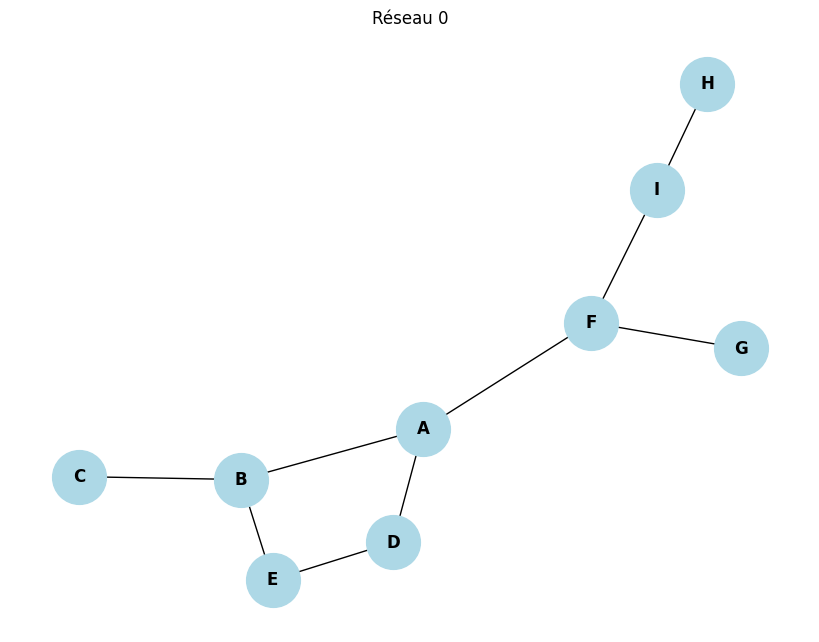

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Définir les arêtes du graphe pour le réseau 0
edges = [
    ('A', 'B'), ('A', 'D'), ('A', 'F'),
    ('B', 'E'), ('B', 'C'),
    ('D', 'E'),
    ('F', 'G'), ('F', 'I'),
    ('I', 'H')
]

# Créer le graphe
G = nx.Graph()
G.add_edges_from(edges)

# Fonction pour calculer la longueur des plus courts chemins
def shortest_path_length(graph, source):
    lengths = nx.single_source_shortest_path_length(graph, source)
    return lengths

# Fonction pour calculer la moyenne des longueurs des chemins
def average_shortest_path_length(lengths):
    total_length = sum(lengths.values())
    num_reachable_nodes = len(lengths) - 1  # exclure le nœud source
    average_length = total_length / num_reachable_nodes if num_reachable_nodes > 0 else 0
    return average_length

# Fonction pour calculer la centralité de proximité
def closeness_centrality(graph):
    centrality = {}
    for node in graph.nodes():
        lengths = shortest_path_length(graph, node)
        avg_length = average_shortest_path_length(lengths)
        centrality[node] = 1 / avg_length if avg_length > 0 else 0
    return centrality

# Calculer la centralité de proximité pour le réseau 0
centrality = closeness_centrality(G)

# Afficher les résultats
print("Centralité de Proximité :")
for node, centrality_value in centrality.items():
    print(f"Nœud: {node}, Centralité de proximité: {centrality_value:.4f}")

# Dessiner le graphe
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Positionnement des nœuds
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=12, font_weight='bold')
plt.title("Réseau 0")
plt.show()

4-Application de l'algorithme aux réseaux de l'archive « data.zip ».

In [ ]:
import networkx as nx
import glob

# Fonction pour analyser la centralité de proximité d'un réseau à partir d'un fichier
def analyze_proximity_centrality(file_path):
    with open(file_path, 'r') as f:
        # Lire les lignes du fichier
        lines = f.readlines()
        n_nodes, n_edges = map(int, lines[0].strip().split())
        edges = [tuple(line.strip().split()) for line in lines[1:]]

    # Créer le graphe
    G = nx.Graph()
    G.add_edges_from(edges)

    # Calculer la centralité de proximité
    closeness = nx.closeness_centrality(G)

    # Afficher les résultats de la centralité de proximité
    print(f"Résultats pour {file_path}:")
    print(f"Nombre de nœuds : {n_nodes}")
    print(f"Nombre d'arêtes : {n_edges}")
    print("Centralité de proximité :")
    for node, centrality in closeness.items():
        print(f"Nœud {node}: Centralité de proximité = {centrality:.4f}")
    print("\n")  # Saut de ligne pour la lisibilité

# Chemin vers le dossier contenant les fichiers
file_path_pattern = 'village_friendship_network.txt'  # Assure-toi que le dossier contient tes fichiers .txt
# Boucle sur tous les fichiers .txt dans le dossier
for file_path in glob.glob(file_path_pattern):
    analyze_proximity_centrality(file_path)


Résultats pour village_friendship_network.txt:
Nombre de nœuds : 20
Nombre d'arêtes : 30
Centralité de proximité :
Nœud V6: Centralité de proximité = 0.4318
Nœud V15: Centralité de proximité = 0.4130
Nœud V4: Centralité de proximité = 0.4750
Nœud V9: Centralité de proximité = 0.5588
Nœud V12: Centralité de proximité = 0.3519
Nœud V16: Centralité de proximité = 0.5000
Nœud V5: Centralité de proximité = 0.3725
Nœud V13: Centralité de proximité = 0.4222
Nœud V8: Centralité de proximité = 0.5135
Nœud V1: Centralité de proximité = 0.3878
Nœud V3: Centralité de proximité = 0.3800
Nœud V2: Centralité de proximité = 0.3654
Nœud V10: Centralité de proximité = 0.3333
Nœud V20: Centralité de proximité = 0.4130
Nœud V17: Centralité de proximité = 0.4043
Nœud V14: Centralité de proximité = 0.3393
Nœud V18: Centralité de proximité = 0.2568
Nœud V19: Centralité de proximité = 0.4043
Nœud V11: Centralité de proximité = 0.2923
Nœud V7: Centralité de proximité = 0.2639




In [ ]:
import networkx as nx
import glob

# Fonction pour analyser la centralité de proximité d'un réseau à partir d'un fichier
def analyze_proximity_centrality(file_path):
    with open(file_path, 'r') as f:
        # Lire les lignes du fichier
        lines = f.readlines()
        n_nodes, n_edges = map(int, lines[0].strip().split())
        edges = [tuple(line.strip().split()) for line in lines[1:]]

    # Créer le graphe
    G = nx.Graph()
    G.add_edges_from(edges)

    # Calculer la centralité de proximité
    closeness = nx.closeness_centrality(G)

    # Afficher les résultats de la centralité de proximité
    print(f"Résultats pour {file_path}:")
    print(f"Nombre de nœuds : {n_nodes}")
    print(f"Nombre d'arêtes : {n_edges}")
    print("Centralité de proximité :")
    for node, centrality in closeness.items():
        print(f"Nœud {node}: Centralité de proximité = {centrality:.4f}")
    print("\n")  # Saut de ligne pour la lisibilité

# Chemin vers le dossier contenant les fichiers
file_path_pattern = 'university_students_projects.txt'  # Assure-toi que le dossier contient tes fichiers .txt
# Boucle sur tous les fichiers .txt dans le dossier
for file_path in glob.glob(file_path_pattern):
    analyze_proximity_centrality(file_path)

Résultats pour university_students_projects.txt:
Nombre de nœuds : 50
Nombre d'arêtes : 100
Centralité de proximité :
Nœud U13: Centralité de proximité = 0.3852
Nœud U42: Centralité de proximité = 0.3760
Nœud U26: Centralité de proximité = 0.3701
Nœud U39: Centralité de proximité = 0.3983
Nœud U8: Centralité de proximité = 0.3983
Nœud U18: Centralité de proximité = 0.3917
Nœud U14: Centralité de proximité = 0.3983
Nœud U31: Centralité de proximité = 0.3176
Nœud U22: Centralité de proximité = 0.3760
Nœud U44: Centralité de proximité = 0.3730
Nœud U49: Centralité de proximité = 0.4052
Nœud U7: Centralité de proximité = 0.3950
Nœud U19: Centralité de proximité = 0.4087
Nœud U2: Centralité de proximité = 0.4234
Nœud U32: Centralité de proximité = 0.4017
Nœud U1: Centralité de proximité = 0.3406
Nœud U3: Centralité de proximité = 0.3534
Nœud U6: Centralité de proximité = 0.3287
Nœud U4: Centralité de proximité = 0.2975
Nœud U50: Centralité de proximité = 0.4196
Nœud U25: Centralité de proxi

In [ ]:
import networkx as nx
import glob

# Fonction pour analyser la centralité de proximité d'un réseau à partir d'un fichier
def analyze_proximity_centrality(file_path):
    with open(file_path, 'r') as f:
        # Lire les lignes du fichier
        lines = f.readlines()
        n_nodes, n_edges = map(int, lines[0].strip().split())
        edges = [tuple(line.strip().split()) for line in lines[1:]]

    # Créer le graphe
    G = nx.Graph()
    G.add_edges_from(edges)

    # Calculer la centralité de proximité
    closeness = nx.closeness_centrality(G)

    # Afficher les résultats de la centralité de proximité
    print(f"Résultats pour {file_path}:")
    print(f"Nombre de nœuds : {n_nodes}")
    print(f"Nombre d'arêtes : {n_edges}")
    print("Centralité de proximité :")
    for node, centrality in closeness.items():
        print(f"Nœud {node}: Centralité de proximité = {centrality:.4f}")
    print("\n")  # Saut de ligne pour la lisibilité

# Chemin vers le dossier contenant les fichiers
file_path_pattern = 'regional_gaming_community.txt'  # Assure-toi que le dossier contient tes fichiers .txt
# Boucle sur tous les fichiers .txt dans le dossier
for file_path in glob.glob(file_path_pattern):
    analyze_proximity_centrality(file_path)

Résultats pour regional_gaming_community.txt:
Nombre de nœuds : 60
Nombre d'arêtes : 120
Centralité de proximité :
Nœud G26: Centralité de proximité = 0.3694
Nœud G30: Centralité de proximité = 0.3816
Nœud G24: Centralité de proximité = 0.3277
Nœud G42: Centralité de proximité = 0.3118
Nœud G1: Centralité de proximité = 0.2944
Nœud G49: Centralité de proximité = 0.3766
Nœud G5: Centralité de proximité = 0.3494
Nœud G28: Centralité de proximité = 0.3118
Nœud G9: Centralité de proximité = 0.3648
Nœud G37: Centralité de proximité = 0.3648
Nœud G14: Centralité de proximité = 0.3766
Nœud G13: Centralité de proximité = 0.3742
Nœud G17: Centralité de proximité = 0.4000
Nœud G15: Centralité de proximité = 0.3625
Nœud G23: Centralité de proximité = 0.3537
Nœud G51: Centralité de proximité = 0.2843
Nœud G44: Centralité de proximité = 0.3648
Nœud G59: Centralité de proximité = 0.2915
Nœud G20: Centralité de proximité = 0.3392
Nœud G22: Centralité de proximité = 0.3152
Nœud G19: Centralité de prox

In [ ]:
import networkx as nx
import glob

# Fonction pour analyser la centralité de proximité d'un réseau à partir d'un fichier
def analyze_proximity_centrality(file_path):
    with open(file_path, 'r') as f:
        # Lire les lignes du fichier
        lines = f.readlines()
        n_nodes, n_edges = map(int, lines[0].strip().split())
        edges = [tuple(line.strip().split()) for line in lines[1:]]

    # Créer le graphe
    G = nx.Graph()
    G.add_edges_from(edges)

    # Calculer la centralité de proximité
    closeness = nx.closeness_centrality(G)

    # Afficher les résultats de la centralité de proximité
    print(f"Résultats pour {file_path}:")
    print(f"Nombre de nœuds : {n_nodes}")
    print(f"Nombre d'arêtes : {n_edges}")
    print("Centralité de proximité :")
    for node, centrality in closeness.items():
        print(f"Nœud {node}: Centralité de proximité = {centrality:.4f}")
    print("\n")  # Saut de ligne pour la lisibilité

# Chemin vers le dossier contenant les fichiers
file_path_pattern = 'international_research_collaboration.txt'  # Assure-toi que le dossier contient tes fichiers .txt
# Boucle sur tous les fichiers .txt dans le dossier
for file_path in glob.glob(file_path_pattern):
    analyze_proximity_centrality(file_path)

Résultats pour international_research_collaboration.txt:
Nombre de nœuds : 80
Nombre d'arêtes : 200
Centralité de proximité :
Nœud R50: Centralité de proximité = 0.3545
Nœud R61: Centralité de proximité = 0.3645
Nœud R7: Centralité de proximité = 0.3920
Nœud R35: Centralité de proximité = 0.3628
Nœud R70: Centralité de proximité = 0.3594
Nœud R18: Centralité de proximité = 0.3824
Nœud R10: Centralité de proximité = 0.3939
Nœud R11: Centralité de proximité = 0.3920
Nœud R69: Centralité de proximité = 0.4407
Nœud R6: Centralité de proximité = 0.3529
Nœud R48: Centralité de proximité = 0.4127
Nœud R57: Centralité de proximité = 0.3514
Nœud R66: Centralité de proximité = 0.3333
Nœud R65: Centralité de proximité = 0.3645
Nœud R24: Centralité de proximité = 0.3594
Nœud R26: Centralité de proximité = 0.3498
Nœud R59: Centralité de proximité = 0.3482
Nœud R28: Centralité de proximité = 0.3768
Nœud R16: Centralité de proximité = 0.3628
Nœud R40: Centralité de proximité = 0.3562
Nœud R37: Centra

In [ ]:
import networkx as nx
import glob

# Fonction pour analyser la centralité de proximité d'un réseau à partir d'un fichier
def analyze_proximity_centrality(file_path):
    with open(file_path, 'r') as f:
        # Lire les lignes du fichier
        lines = f.readlines()
        n_nodes, n_edges = map(int, lines[0].strip().split())
        edges = [tuple(line.strip().split()) for line in lines[1:]]

    # Créer le graphe
    G = nx.Graph()
    G.add_edges_from(edges)

    # Calculer la centralité de proximité
    closeness = nx.closeness_centrality(G)

    # Afficher les résultats de la centralité de proximité
    print(f"Résultats pour {file_path}:")
    print(f"Nombre de nœuds : {n_nodes}")
    print(f"Nombre d'arêtes : {n_edges}")
    print("Centralité de proximité :")
    for node, centrality in closeness.items():
        print(f"Nœud {node}: Centralité de proximité = {centrality:.4f}")
    print("\n")  # Saut de ligne pour la lisibilité

# Chemin vers le dossier contenant les fichiers
file_path_pattern = 'corporate_collaboration_network.txt'  # Assure-toi que le dossier contient tes fichiers .txt
# Boucle sur tous les fichiers .txt dans le dossier
for file_path in glob.glob(file_path_pattern):
    analyze_proximity_centrality(file_path)

Résultats pour corporate_collaboration_network.txt:
Nombre de nœuds : 100
Nombre d'arêtes : 150
Centralité de proximité :
Nœud C18: Centralité de proximité = 0.3067
Nœud C72: Centralité de proximité = 0.2831
Nœud C79: Centralité de proximité = 0.2682
Nœud C88: Centralité de proximité = 0.2371
Nœud C81: Centralité de proximité = 0.2875
Nœud C1: Centralité de proximité = 0.2763
Nœud C95: Centralité de proximité = 0.2667
Nœud C26: Centralité de proximité = 0.2460
Nœud C94: Centralité de proximité = 0.3046
Nœud C15: Centralité de proximité = 0.3321
Nœud C61: Centralité de proximité = 0.2329
Nœud C70: Centralité de proximité = 0.3026
Nœud C82: Centralité de proximité = 0.2706
Nœud C39: Centralité de proximité = 0.2534
Nœud C42: Centralité de proximité = 0.3036
Nœud C8: Centralité de proximité = 0.2722
Nœud C73: Centralité de proximité = 0.2440
Nœud C14: Centralité de proximité = 0.2621
Nœud C22: Centralité de proximité = 0.2706
Nœud C5: Centralité de proximité = 0.2486
Nœud C83: Centralité 

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd

# Définir les arêtes du graphe pour le réseau 0
edges = [
    ('A', 'B'), ('A', 'D'), ('A', 'F'),
    ('B', 'E'), ('B', 'C'),
    ('D', 'E'),
    ('F', 'G'), ('F', 'I'),
    ('I', 'H')
]

# Créer le graphe
G = nx.Graph()
G.add_edges_from(edges)

# Calculer la centralité de proximité
closeness = nx.closeness_centrality(G)

# Calculer les valeurs requises
min_closeness = min(closeness.values())
max_closeness = max(closeness.values())
mean_closeness = np.mean(list(closeness.values()))

# Trouver les nœuds concernés
min_nodes = [k for k, v in closeness.items() if v == min_closeness]
max_nodes = [k for k, v in closeness.items() if v == max_closeness]

# Créer un tableau de résultats
results = {
    "Caractéristique": [
        "Nombre de nœuds",
        "Nombre d'arêtes",
        "Centralité de proximité - min",
        "Centralité de proximité - max",
        "Centralité de proximité - moyenne",
        "Nœud concerné - min",
        "Nœud concerné - max"
    ],
    "Valeur": [
        len(G.nodes),
        len(G.edges),
        min_closeness,
        max_closeness,
        mean_closeness,
        ", ".join(min_nodes),
        ", ".join(max_nodes)
    ]
}

# Convertir en DataFrame pour un affichage propre
results_df = pd.DataFrame(results)

# Afficher le tableau de résultats
print(results_df)



                     Caractéristique    Valeur
0                    Nombre de nœuds         9
1                    Nombre d'arêtes         9
2      Centralité de proximité - min  0.296296
3      Centralité de proximité - max  0.571429
4  Centralité de proximité - moyenne  0.417034
5                Nœud concerné - min         H
6                Nœud concerné - max         A


In [ ]:
import networkx as nx
import numpy as np
import pandas as pd

# Fonction pour analyser la centralité de proximité d'un réseau à partir d'un fichier
def analyze_proximity_centrality(file_path):
    with open(file_path, 'r') as f:
        # Lire les lignes du fichier
        lines = f.readlines()
        n_nodes, n_edges = map(int, lines[0].strip().split())
        edges = [tuple(line.strip().split()) for line in lines[1:]]

    # Créer le graphe
    G = nx.Graph()
    G.add_edges_from(edges)

    # Calculer la centralité de proximité
    closeness = nx.closeness_centrality(G)

    # Calculer les valeurs requises
    min_closeness = min(closeness.values())
    max_closeness = max(closeness.values())
    mean_closeness = np.mean(list(closeness.values()))

    # Trouver les nœuds concernés
    min_nodes = [k for k, v in closeness.items() if v == min_closeness]
    max_nodes = [k for k, v in closeness.items() if v == max_closeness]

    # Créer un tableau de résultats
    results = {
        "Caractéristique": [
            "Nombre de nœuds",
            "Nombre d'arêtes",
            "Centralité de proximité - min",
            "Centralité de proximité - max",
            "Centralité de proximité - moyenne",
            "Nœud concerné - min",
            "Nœud concerné - max"
        ],
        "Valeur": [
            n_nodes,
            n_edges,
            min_closeness,
            max_closeness,
            mean_closeness,
            ", ".join(min_nodes),
            ", ".join(max_nodes)
        ],
        "Nœud concerné": [
            "",  # Pas de nœud concerné pour le nombre de nœuds
            "",  # Pas de nœud concerné pour le nombre d'arêtes
            ", ".join(min_nodes),
            ", ".join(max_nodes),
            "",  # Pas de nœud concerné pour la moyenne
            ", ".join(min_nodes),
            ", ".join(max_nodes)
        ]
    }

    return pd.DataFrame(results)

# Chemin vers le fichier
file_path = 'village_friendship_network.txt'  # Change ce chemin si nécessaire

# Analyser la centralité de proximité
results_df = analyze_proximity_centrality(file_path)

# Afficher le tableau de résultats
print(results_df)

                     Caractéristique    Valeur Nœud concerné
0                    Nombre de nœuds        20              
1                    Nombre d'arêtes        30              
2      Centralité de proximité - min  0.256757           V18
3      Centralité de proximité - max  0.558824            V9
4  Centralité de proximité - moyenne  0.393954              
5                Nœud concerné - min       V18           V18
6                Nœud concerné - max        V9            V9


In [ ]:
import networkx as nx
import numpy as np
import pandas as pd

# Fonction pour analyser la centralité de proximité d'un réseau à partir d'un fichier
def analyze_proximity_centrality(file_path):
    with open(file_path, 'r') as f:
        # Lire les lignes du fichier
        lines = f.readlines()
        n_nodes, n_edges = map(int, lines[0].strip().split())
        edges = [tuple(line.strip().split()) for line in lines[1:]]

    # Créer le graphe
    G = nx.Graph()
    G.add_edges_from(edges)

    # Calculer la centralité de proximité
    closeness = nx.closeness_centrality(G)

    # Calculer les valeurs requises
    min_closeness = min(closeness.values())
    max_closeness = max(closeness.values())
    mean_closeness = np.mean(list(closeness.values()))

    # Trouver les nœuds concernés
    min_nodes = [k for k, v in closeness.items() if v == min_closeness]
    max_nodes = [k for k, v in closeness.items() if v == max_closeness]

    # Créer un tableau de résultats
    results = {
        "Caractéristique": [
            "Nombre de nœuds",
            "Nombre d'arêtes",
            "Centralité de proximité - min",
            "Centralité de proximité - max",
            "Centralité de proximité - moyenne",
            "Nœud concerné - min",
            "Nœud concerné - max"
        ],
        "Valeur": [
            n_nodes,
            n_edges,
            min_closeness,
            max_closeness,
            mean_closeness,
            ", ".join(min_nodes),
            ", ".join(max_nodes)
        ],
        "Nœud concerné": [
            "",  # Pas de nœud concerné pour le nombre de nœuds
            "",  # Pas de nœud concerné pour le nombre d'arêtes
            ", ".join(min_nodes),
            ", ".join(max_nodes),
            "",  # Pas de nœud concerné pour la moyenne
            ", ".join(min_nodes),
            ", ".join(max_nodes)
        ]
    }

    return pd.DataFrame(results)

# Chemin vers le fichier
file_path = 'corporate_collaboration_network.txt'  # Change ce chemin si nécessaire

# Analyser la centralité de proximité
results_df = analyze_proximity_centrality(file_path)

# Afficher le tableau de résultats
print(results_df)

                     Caractéristique    Valeur Nœud concerné
0                    Nombre de nœuds       100              
1                    Nombre d'arêtes       150              
2      Centralité de proximité - min  0.165171           C19
3      Centralité de proximité - max  0.333333           C93
4  Centralité de proximité - moyenne  0.251225              
5                Nœud concerné - min       C19           C19
6                Nœud concerné - max       C93           C93


In [ ]:
import networkx as nx
import numpy as np
import pandas as pd

# Fonction pour analyser la centralité de proximité d'un réseau à partir d'un fichier
def analyze_proximity_centrality(file_path):
    with open(file_path, 'r') as f:
        # Lire les lignes du fichier
        lines = f.readlines()
        n_nodes, n_edges = map(int, lines[0].strip().split())
        edges = [tuple(line.strip().split()) for line in lines[1:]]

    # Créer le graphe
    G = nx.Graph()
    G.add_edges_from(edges)

    # Calculer la centralité de proximité
    closeness = nx.closeness_centrality(G)

    # Calculer les valeurs requises
    min_closeness = min(closeness.values())
    max_closeness = max(closeness.values())
    mean_closeness = np.mean(list(closeness.values()))

    # Trouver les nœuds concernés
    min_nodes = [k for k, v in closeness.items() if v == min_closeness]
    max_nodes = [k for k, v in closeness.items() if v == max_closeness]

    # Créer un tableau de résultats
    results = {
        "Caractéristique": [
            "Nombre de nœuds",
            "Nombre d'arêtes",
            "Centralité de proximité - min",
            "Centralité de proximité - max",
            "Centralité de proximité - moyenne",
            "Nœud concerné - min",
            "Nœud concerné - max"
        ],
        "Valeur": [
            n_nodes,
            n_edges,
            min_closeness,
            max_closeness,
            mean_closeness,
            ", ".join(min_nodes),
            ", ".join(max_nodes)
        ],
        "Nœud concerné": [
            "",  # Pas de nœud concerné pour le nombre de nœuds
            "",  # Pas de nœud concerné pour le nombre d'arêtes
            ", ".join(min_nodes),
            ", ".join(max_nodes),
            "",  # Pas de nœud concerné pour la moyenne
            ", ".join(min_nodes),
            ", ".join(max_nodes)
        ]
    }

    return pd.DataFrame(results)

# Chemin vers le fichier
file_path = 'international_research_collaboration.txt'  # Change ce chemin si nécessaire

# Analyser la centralité de proximité
results_df = analyze_proximity_centrality(file_path)

# Afficher le tableau de résultats
print(results_df)

                     Caractéristique    Valeur Nœud concerné
0                    Nombre de nœuds        80              
1                    Nombre d'arêtes       200              
2      Centralité de proximité - min  0.283636           R43
3      Centralité de proximité - max  0.440678           R69
4  Centralité de proximité - moyenne  0.354502              
5                Nœud concerné - min       R43           R43
6                Nœud concerné - max       R69           R69


In [ ]:
import networkx as nx
import numpy as np
import pandas as pd

# Fonction pour analyser la centralité de proximité d'un réseau à partir d'un fichier
def analyze_proximity_centrality(file_path):
    with open(file_path, 'r') as f:
        # Lire les lignes du fichier
        lines = f.readlines()
        n_nodes, n_edges = map(int, lines[0].strip().split())
        edges = [tuple(line.strip().split()) for line in lines[1:]]

    # Créer le graphe
    G = nx.Graph()
    G.add_edges_from(edges)

    # Calculer la centralité de proximité
    closeness = nx.closeness_centrality(G)

    # Calculer les valeurs requises
    min_closeness = min(closeness.values())
    max_closeness = max(closeness.values())
    mean_closeness = np.mean(list(closeness.values()))

    # Trouver les nœuds concernés
    min_nodes = [k for k, v in closeness.items() if v == min_closeness]
    max_nodes = [k for k, v in closeness.items() if v == max_closeness]

    # Créer un tableau de résultats
    results = {
        "Caractéristique": [
            "Nombre de nœuds",
            "Nombre d'arêtes",
            "Centralité de proximité - min",
            "Centralité de proximité - max",
            "Centralité de proximité - moyenne",
            "Nœud concerné - min",
            "Nœud concerné - max"
        ],
        "Valeur": [
            n_nodes,
            n_edges,
            min_closeness,
            max_closeness,
            mean_closeness,
            ", ".join(min_nodes),
            ", ".join(max_nodes)
        ],
        "Nœud concerné": [
            "",  # Pas de nœud concerné pour le nombre de nœuds
            "",  # Pas de nœud concerné pour le nombre d'arêtes
            ", ".join(min_nodes),
            ", ".join(max_nodes),
            "",  # Pas de nœud concerné pour la moyenne
            ", ".join(min_nodes),
            ", ".join(max_nodes)
        ]
    }

    return pd.DataFrame(results)

# Chemin vers le fichier
file_path = 'regional_gaming_community.txt'  # Change ce chemin si nécessaire

# Analyser la centralité de proximité
results_df = analyze_proximity_centrality(file_path)

# Afficher le tableau de résultats
print(results_df)

                     Caractéristique    Valeur Nœud concerné
0                    Nombre de nœuds        60              
1                    Nombre d'arêtes       120              
2      Centralité de proximité - min  0.185897            G6
3      Centralité de proximité - max  0.408451           G12
4  Centralité de proximité - moyenne  0.330347              
5                Nœud concerné - min        G6            G6
6                Nœud concerné - max       G12           G12


In [ ]:
import networkx as nx
import numpy as np
import pandas as pd

# Fonction pour analyser la centralité de proximité d'un réseau à partir d'un fichier
def analyze_proximity_centrality(file_path):
    with open(file_path, 'r') as f:
        # Lire les lignes du fichier
        lines = f.readlines()
        n_nodes, n_edges = map(int, lines[0].strip().split())
        edges = [tuple(line.strip().split()) for line in lines[1:]]

    # Créer le graphe
    G = nx.Graph()
    G.add_edges_from(edges)

    # Calculer la centralité de proximité
    closeness = nx.closeness_centrality(G)

    # Calculer les valeurs requises
    min_closeness = min(closeness.values())
    max_closeness = max(closeness.values())
    mean_closeness = np.mean(list(closeness.values()))

    # Trouver les nœuds concernés
    min_nodes = [k for k, v in closeness.items() if v == min_closeness]
    max_nodes = [k for k, v in closeness.items() if v == max_closeness]

    # Créer un tableau de résultats
    results = {
        "Caractéristique": [
            "Nombre de nœuds",
            "Nombre d'arêtes",
            "Centralité de proximité - min",
            "Centralité de proximité - max",
            "Centralité de proximité - moyenne",
            "Nœud concerné - min",
            "Nœud concerné - max"
        ],
        "Valeur": [
            n_nodes,
            n_edges,
            min_closeness,
            max_closeness,
            mean_closeness,
            ", ".join(min_nodes),
            ", ".join(max_nodes)
        ],
        "Nœud concerné": [
            "",  # Pas de nœud concerné pour le nombre de nœuds
            "",  # Pas de nœud concerné pour le nombre d'arêtes
            ", ".join(min_nodes),
            ", ".join(max_nodes),
            "",  # Pas de nœud concerné pour la moyenne
            ", ".join(min_nodes),
            ", ".join(max_nodes)
        ]
    }

    return pd.DataFrame(results)

# Chemin vers le fichier
file_path = 'university_students_projects.txt'  # Change ce chemin si nécessaire

# Analyser la centralité de proximité
results_df = analyze_proximity_centrality(file_path)

# Afficher le tableau de résultats
print(results_df)

                     Caractéristique    Valeur Nœud concerné
0                    Nombre de nœuds        50              
1                    Nombre d'arêtes       100              
2      Centralité de proximité - min  0.218605           U35
3      Centralité de proximité - max  0.435185           U45
4  Centralité de proximité - moyenne  0.359334              
5                Nœud concerné - min       U35           U35
6                Nœud concerné - max       U45           U45


# Fin Centralité 5 : proximité